***REVELANDO LA ESENCIA DEL CLIENTE 1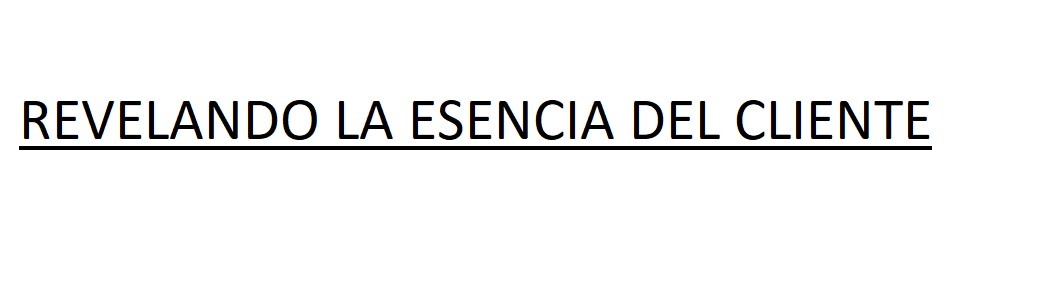***

# 1. Configurando el Ambiente

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Obtención y transformación de los datos

## Obtención del dataset inicial

In [ ]:
# Se importan todas las liberías que serán necesarias en los análisis de datos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/drive/MyDrive/media prediction and its cost.csv')
dataset.sample(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
47917,Pizza,Frozen Foods,Food,8.04,2.4924,3.0,Double Down Sale,USA,S,M,1.0,Bachelors Degree,Normal,Management,Y,1.0,$10K - $30K,0.0,1.0,Golden,2.68,12.80,10.80,1.0,1.0,17.0,Gourmet Supermarket,Beverly Hills,CA,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,Daily Paper,55.96
38690,Snack Foods,Snack Foods,Food,7.98,3.6708,3.0,Savings Galore,USA,M,M,5.0,Partial High School,Bronze,Management,Y,3.0,$70K - $90K,2.0,3.0,Fort West,2.66,9.31,7.31,0.0,1.0,7.0,Supermarket,Spokane,WA,30268.0,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio",136.57
42161,Beer and Wine,Alcoholic Beverages,Drink,2.73,1.2558,3.0,Saving Days,USA,M,M,4.0,High School Degree,Golden,Skilled Manual,Y,3.0,$30K - $50K,4.0,3.0,Pearl,0.91,11.60,8.60,0.0,0.0,33.0,Gourmet Supermarket,Beverly Hills,CA,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,"Sunday Paper, Radio, TV",67.11
37476,Eggs,Eggs,Food,5.32,2.0216,4.0,Dimes Off,Mexico,M,F,5.0,Graduate Degree,Golden,Management,Y,3.0,$70K - $90K,5.0,3.0,Giant,1.33,10.90,9.89,1.0,1.0,33.0,Deluxe Supermarket,Hidalgo,Zacatecas,30584.0,21938.0,5188.0,3458.0,1.0,1.0,1.0,1.0,1.0,Radio,115.25
47868,Pizza,Frozen Foods,Food,13.84,4.8440,4.0,Big Promo,USA,M,M,5.0,High School Degree,Golden,Manual,N,3.0,$30K - $50K,4.0,3.0,Imagine,3.46,11.00,9.00,0.0,1.0,25.0,Gourmet Supermarket,Beverly Hills,CA,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,"Sunday Paper, Radio, TV",117.04


CAMBIO DE NOMBRE A COLUMNAS, PRIMERA ETAPA DE LA MODIFICACIÓN

In [ ]:
columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'ventas_unitarias(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'miembro',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox)',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}

In [ ]:
dataset = dataset.rename(columns = columnas)
dataset.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
47916,Pizza,Frozen Foods,Food,13.84,6.2280,4.0,You Save Days,USA,S,F,5.0,Bachelors Degree,Normal,Management,Y,2.0,$10K - $30K,0.0,2.0,Imagine,3.46,11.00,9.00,0.0,1.0,25.0,Gourmet Supermarket,Beverly Hills,CA,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,Bulk Mail,131.81
40121,Snack Foods,Snack Foods,Food,6.45,3.0315,3.0,Dimes Off,Mexico,S,M,0.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,0.0,2.0,Fort West,2.15,16.00,15.00,1.0,0.0,30.0,Deluxe Supermarket,Hidalgo,Zacatecas,30584.0,21938.0,5188.0,3458.0,1.0,1.0,1.0,1.0,1.0,Radio,115.25
33687,Jams and Jellies,Baking Goods,Food,6.72,2.4192,4.0,Big Time Discounts,Mexico,M,F,4.0,Partial High School,Normal,Skilled Manual,N,1.0,$10K - $30K,1.0,1.0,Plato,1.68,19.30,16.20,1.0,0.0,23.0,Deluxe Supermarket,Hidalgo,Zacatecas,30584.0,21938.0,5188.0,3458.0,1.0,1.0,1.0,1.0,1.0,Street Handout,62.74
11522,Dairy,Dairy,Food,7.90,2.4490,2.0,Super Savers,Mexico,M,M,3.0,Bachelors Degree,Bronze,Professional,N,2.0,$50K - $70K,2.0,2.0,Club,3.95,9.95,7.94,0.0,1.0,36.0,Mid-Size Grocery,Mexico City,DF,36509.0,22450.0,8435.0,5624.0,0.0,0.0,0.0,0.0,0.0,"Daily Paper, Radio",101.61
9257,Snack Foods,Snack Foods,Food,12.56,4.8984,4.0,Free For All,USA,S,M,1.0,High School Degree,Normal,Manual,Y,1.0,$30K - $50K,0.0,1.0,Fast,3.14,13.10,12.10,1.0,0.0,34.0,Supermarket,Portland,OR,20319.0,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,Daily Paper,52.06


In [ ]:
dataset.columns

Index(['categoria_alimento', 'departamento', 'tipo',
       'ventas_tienda(en millones)', 'costo_tienda(en millones)',
       'ventas_unitarias(en millones)', 'promocion', 'pais', 'estado_civil',
       'genero', 'total_de_hijos', 'escolaridad', 'miembro', 'ocupacion',
       'vivienda_propia', 'promedio_autos(aprox)', 'ingreso_anual',
       'numero_hijos', 'promedio_autos(aprox)', 'marca', 'precio_recomendado',
       'peso_bruto', 'peso_neto', 'empaque_reciclable', 'bajo_en_grasa',
       'unidades_por_caja', 'comercio', 'ciudad', 'estado',
       'pies_cuadrados_tienda', 'pies_cuadrados_comestibles',
       'pies_cuadrados_congelados', 'pies_cuadrados_carne', 'cafeteria',
       'tienda_de_videos', 'barra_de_ensaladas', 'comida_preparada',
       'floristeria', 'divulgacion', 'costo'],
      dtype='object')

In [ ]:
categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}

tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

miembro = {
    'Bronze':'Bronce',
    'Golden': 'Oro',
    'Silver':'Plata'
}

ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

pais = {
    'USA':'Estados Unidos',
    'Mexico':'México',
    'Canada':'Canadá'
}

estado_civil = {
    'S':'Soltero', 'M':'Casado'
}

genero ={
    'F':'Femenino',
    'M':'Masculino'
}

vivienda_propia={'Y':'Sí', 'N':'No'}

ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}



comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}


divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}


SE CREAN DOS LISTAS: **CAMBIOS**: EN LA CUAL SE ALMACENAN LOS DICCIONARIOS QUE MODIFICARÁN LOS VALORES DE LOS TÍTULOS DE LAS COLUMNAS. **CAMBIOS1**: ALMACENA LOS MISMOS VALORES, PERO ENTRE COMILLAS, LO QUE PERMITE PODER IR MOVIENDOSE COLUMNA POR COLUMNA EN EL DATAFRAME. EL OBJETIVO ES HACER TODO EL PROCESO EN UN CICLO FOR QUE SEA DEL MENOR TAMAÑO POSIBLE.

In [ ]:
cambios = [categoria_alimento, departamento,tipo, promocion, escolaridad, miembro,ocupacion, pais,estado_civil, genero, vivienda_propia, ingreso_anual, comercio, divulgacion]

In [ ]:
cambios1 = ["categoria_alimento", "departamento","tipo", "promocion", "escolaridad", "miembro","ocupacion", "pais","estado_civil", "genero", "vivienda_propia", "ingreso_anual", "comercio", "divulgacion"]

In [ ]:
for k in range(0,len(cambios)):
  dataset[cambios1[k]] = dataset[cambios1[k]].replace(cambios[k])

#Visualización final de los datos luego de haber cambiado el nombre de las columnas y los valores en su interior.

dataset.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
17218,Alimentos ricos en almidón,Alimentos ricos en almidón,Comida,5.12,2.304,2.0,Descuentos de gran magnitud,Estados Unidos,Soltero,Masculino,2.0,Secundaria,Plata,Obrero,No,2.0,40000,0.0,2.0,Colossal,2.56,8.6,6.6,0.0,1.0,10.0,Supermercado,Spokane,WA,30268.0,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,Cupón en la tienda,59.40
31837,Sopa enlatada,Alimentos enlatados,Comida,13.45,4.842,5.0,Venta Doble,Estados Unidos,Soltero,Femenino,2.0,Primaria,Bronce,Profesional,No,3.0,100000,0.0,3.0,Pleasant,2.69,20.5,18.5,1.0,0.0,4.0,Supermercado de lujo,Tacoma,WA,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,Televisión,95.74
3313,Vegetales,Productos frescos,Comida,13.15,5.786,5.0,Recortadores de dólares,Estados Unidos,Casado,Masculino,3.0,Primaria,Bronce,Obrero,No,2.0,40000,1.0,2.0,Hermanos,2.63,16.2,14.2,0.0,1.0,30.0,Supermercado,Spokane,WA,30268.0,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,"Periódico dominical, radio, televisión",135.50
55798,Productos de cocina,Artículos para el hogar,No comestible,5.70,2.679,3.0,Recortadores de dólares,México,Casado,Masculino,1.0,Primaria,Oro,Obrero,Sí,2.0,60000,1.0,2.0,Sunset,1.90,17.4,15.3,1.0,0.0,19.0,Supermercado,Acapulco,Guerrero,23593.0,17475.0,3671.0,2447.0,0.0,0.0,0.0,0.0,0.0,Correo masivo,119.26
53242,Higiene,Salud e higiene,No comestible,4.20,1.428,3.0,Ganadores de precios,México,Casado,Femenino,2.0,Superior,Bronce,Profesional,No,2.0,60000,1.0,2.0,Bird Call,1.40,17.0,16.0,0.0,0.0,29.0,Supermercado gourmet,Camacho,Zacatecas,23759.0,16844.0,4149.0,2766.0,1.0,0.0,1.0,1.0,1.0,"Periódico dominical, radio, televisión",147.18


In [ ]:
#Impreson de los nombres de cada columna:
dataset.columns.value_counts()

promedio_autos(aprox)            2
categoria_alimento               1
peso_bruto                       1
empaque_reciclable               1
bajo_en_grasa                    1
unidades_por_caja                1
comercio                         1
ciudad                           1
estado                           1
pies_cuadrados_tienda            1
pies_cuadrados_comestibles       1
pies_cuadrados_congelados        1
pies_cuadrados_carne             1
cafeteria                        1
tienda_de_videos                 1
barra_de_ensaladas               1
comida_preparada                 1
floristeria                      1
divulgacion                      1
peso_neto                        1
precio_recomendado               1
departamento                     1
marca                            1
tipo                             1
ventas_tienda(en millones)       1
costo_tienda(en millones)        1
ventas_unitarias(en millones)    1
promocion                        1
pais                

In [ ]:
#  Una vez concluida la transofrmación de datos a español, se realiza búsqueda de valores perdidos

valores_perdidos = dataset.isna().sum()
valores_perdidos

categoria_alimento               0
departamento                     0
tipo                             0
ventas_tienda(en millones)       0
costo_tienda(en millones)        0
ventas_unitarias(en millones)    0
promocion                        0
pais                             0
estado_civil                     0
genero                           0
total_de_hijos                   0
escolaridad                      0
miembro                          0
ocupacion                        0
vivienda_propia                  0
promedio_autos(aprox)            0
ingreso_anual                    0
numero_hijos                     0
promedio_autos(aprox)            0
marca                            0
precio_recomendado               0
peso_bruto                       0
peso_neto                        0
empaque_reciclable               0
bajo_en_grasa                    0
unidades_por_caja                0
comercio                         0
ciudad                           0
estado              

***SE VERIFICA QUE NO EXISTEN VALORES PERDIDOS, POR LO QUE SE PUEDE PROCEDER DE INMEDIATO A LAS SIGUIENTES FASES DEL PROYECTO SIN TENER QUE HACER CORRECIONES A LOS DATOS.***


# 3. Exploración de los datos

**VARIABLES A ESTUDIAR DE MANERA INICIAL:
ESCOLARIDAD-OCUPACION-GENERO_ESTADO_CIVIL-NUMERO_HIJOS-INGRESO_ANUAL-VIVIENDA_PROPIA-MIEMBRO.**

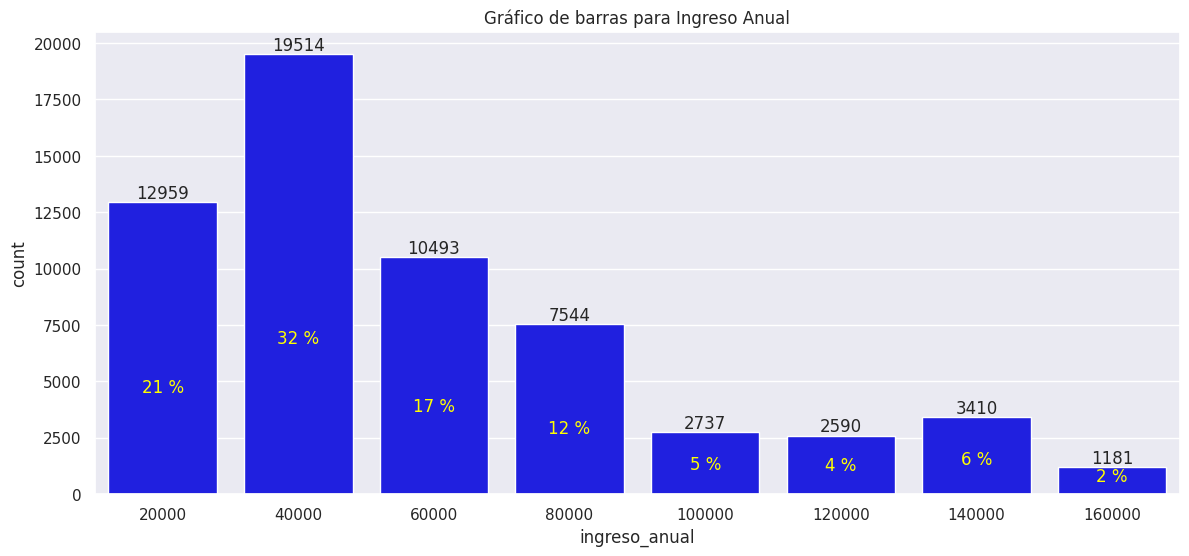

In [ ]:
# Gráfico de barras de ingreso_anual-count
plt.figure(figsize=(14,6))
grafico = sns.countplot(data = dataset, x = dataset['ingreso_anual'],color = 'blue')

cantidad_de_personas = dataset['ingreso_anual'].value_counts().sum()

for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/cantidad_de_personas:.0f} %', ha = 'center', va= 'bottom', color = "yellow")

plt.title('Gráfico de barras para Ingreso Anual')
plt.show()



**ANÁLISIS DE DATOS: EL 82% DE LAS PERSONAS TIENE HASTA UN INGRESO ANUAL DE 80
000 USD, DEJANDO SOLO 18% DE PERSONAS CON INGRESOS SOBRE 100 000 USD O
SUPERIOR.**

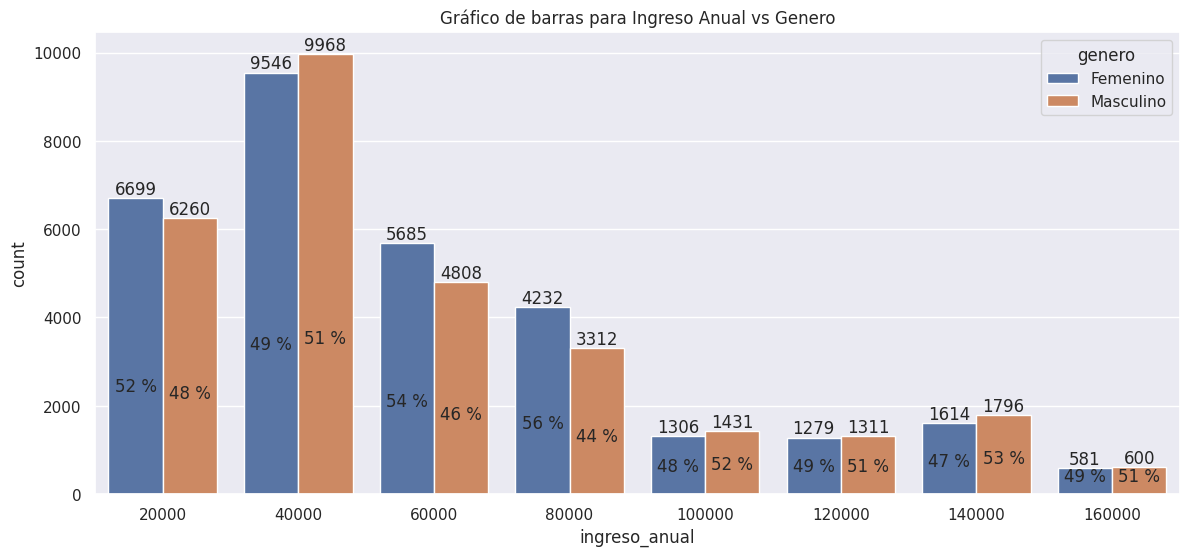

In [ ]:


# Gráfico de Barras : Ingreso Anual (X) , Genero (Y)
plt.figure(figsize=(14,6))
grafico = sns.countplot(data=dataset, x= dataset['ingreso_anual'],hue = dataset['genero'])

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################

for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}', ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico de barras para Ingreso Anual vs Genero')
plt.show()


**ANÁLISIS DE DATOS: EN EL TRAMO DE INGRESOS HASTA 80 000 USD ANUAL, EL GÉNERO FEMENINO TIENE UN PROMEDIO DE 52.75 %, MIENTRAS QUE EL GÉNERO MASCULINO TIENE UN PROMEDIO DE 47.25 %. EN EL TRAMO DE INGRESOS DE 100 000 USD ANUAL O SUPERIOR, EL GÉNERO FEMENINO TIENE UN PROMEDIO DE 48.25 % , MIENRTRAS QUE EL GÉNERO MASCULINO TIENE UN PROMEDIO DE 51.75 %. EN EL TRAMO DE INGRESOS SUPERIORES LOS VALORES PRACTICAMENTE SE INVIERTEN , SIN EMBARGO SE TRATA DE NÚMEROS CERCANOS QUE NO PERMITEN ESTABLECER UNA DIFERENCIA CON CLARIDAD.**

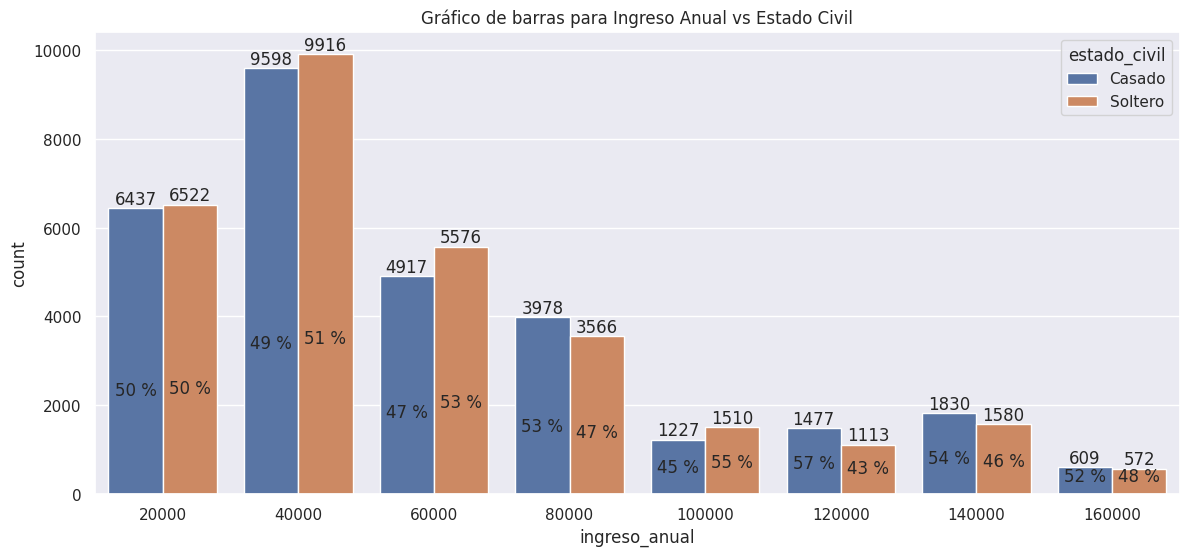

[array([6437., 9598., 4917., 3978., 1227., 1477., 1830.,  609.]), array([6522., 9916., 5576., 3566., 1510., 1113., 1580.,  572.])]
[6437.0, 12959.0, 9598.0, 19514.0, 4917.0, 10493.0, 3978.0, 7544.0, 1227.0, 2737.0, 1477.0, 2590.0, 1830.0, 3410.0, 609.0, 1181.0]


In [ ]:
# Gráfico de Barras : Ingreso Anual (X) , Estado Civil (Y)
plt.figure(figsize=(14,6))
grafico = sns.countplot(data=dataset, x= dataset['ingreso_anual'],hue = dataset['estado_civil'])

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################


for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico de barras para Ingreso Anual vs Estado Civil')
plt.show()




**ANÁLISIS DE DATOS: EN EL TRAMO DE INGRESOS HASTA 80 000 USD ANUAL, EL CASADO TIENE UN PROMEDIO DE 49.75 %, MIENTRAS QUE EL SOLTERO TIENE UN PROMEDIO DE 50.25 %. EN EL TRAMO DE INGRESOS DE 100 000 USD ANUAL O SUPERIOR, EL CASADO TIENE UN PROMEDIO DE 52 % , MIENRTRAS QUE EL SOLTERO TIENE UN PROMEDIO DE 48 %. EN EL TRAMO DE INGRESOS SUPERIORES LOS VALORES PRACTICAMENTE SE INVIERTEN , SIN EMBARGO SE TRATA DE NÚMEROS CERCANOS QUE NO PERMITEN ESTABLECER UNA DIFERENCIA CON CLARIDAD.**

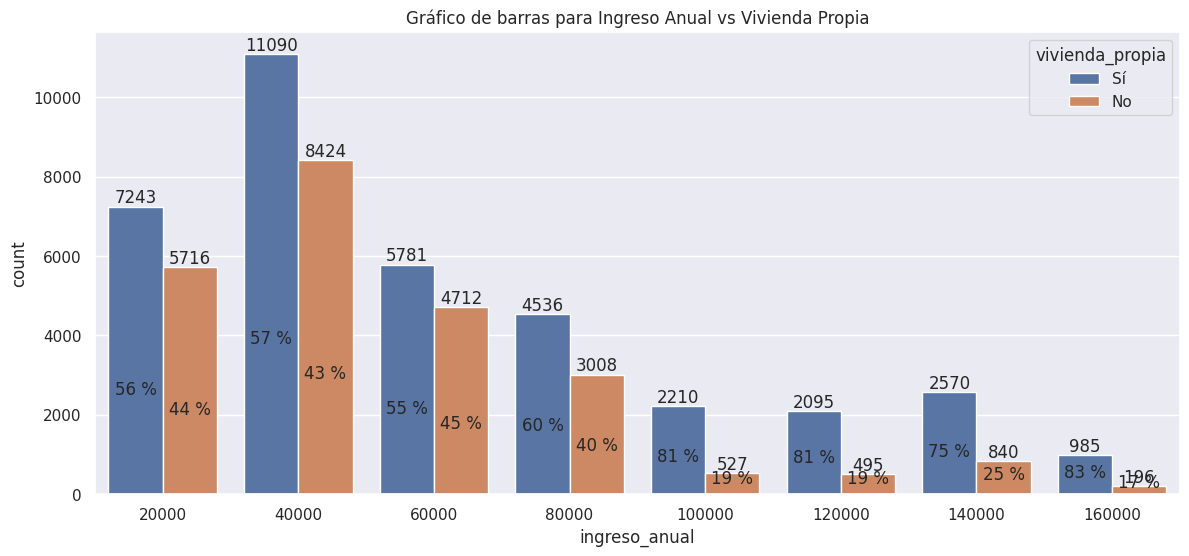

In [ ]:
# Gráfico de Barras : Ingreso Anual (X) , Vivienda Propia (Y)
plt.figure(figsize=(14,6))
grafico = sns.countplot(data=dataset, x= dataset['ingreso_anual'],hue = dataset['vivienda_propia'])


###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################



for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico de barras para Ingreso Anual vs Vivienda Propia')
plt.show()

**ANALISIS DE DATOS: EN EL TRAMO DE INGRESOS HASTA 80 000 USD ANUAL, EL LA GENTE QUE TIENE VIVIENDA PROPIA CORRESPONDE AL 57 %, MIENTRAS QUE LAS PERSONAS QUE NO TIENE VIVIENDA PROPIA CORRESPONDEN AL 43 %. EN EL TRAMO DE INGRESOS DE 100 000 USD Y SUPERIOR, LA GENTE QUE TIENE VIVIENDA PROPIA CORRESPONDE AL 80 % , MIENTRAS QUE LA QUE NO POSEE VIVIENDA PROPIA ES UN 20 %. SE TIENE ENTONCES UN FACTOR A CONSIDERAR PARA ATRAER NUEVOS CLIENTES Y DAR UN MEJOR SERVICIO A LOS QUE YA COMPRAN LOS PRODUCTOS DE LA EMPRESA.**

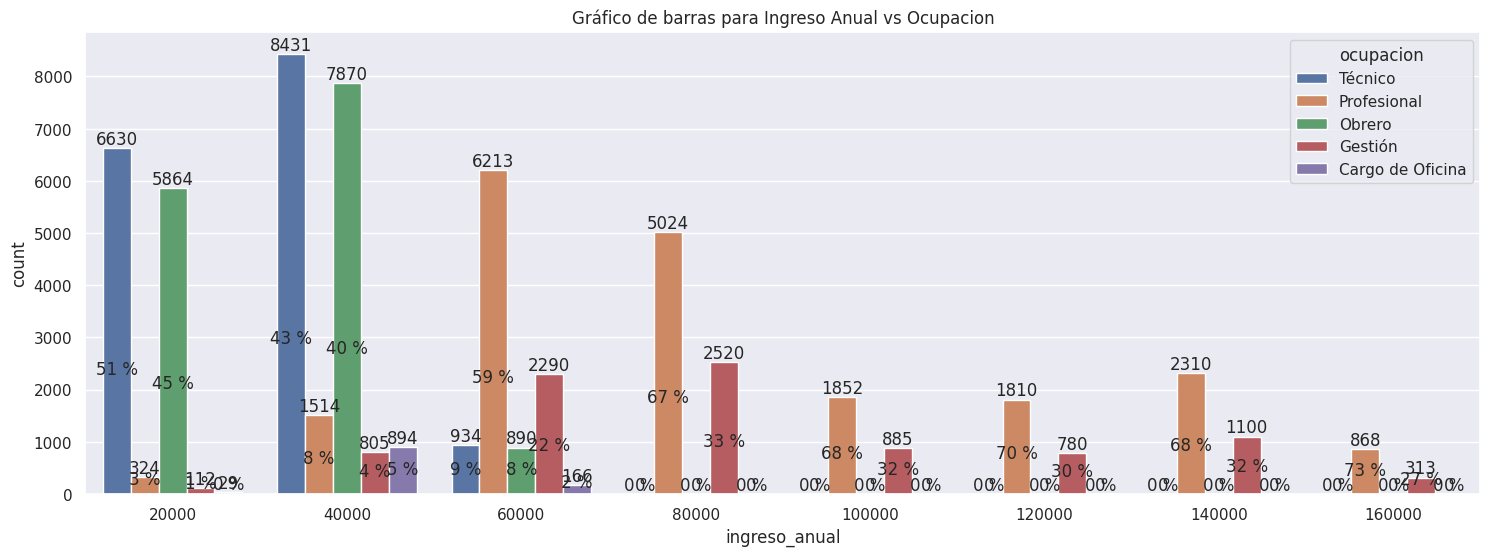

In [ ]:
# Gráfico de Barras : Ingreso Anual (X) , Ocupacion (Y)
plt.figure(figsize=(18,6))
grafico = sns.countplot(data=dataset, x= dataset['ingreso_anual'],hue = dataset['ocupacion'])

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,5):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################


for dato in grafico.containers:
  i=1
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[5*i-1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico de barras para Ingreso Anual vs Ocupacion')
plt.show()



**ANÁLISIS DE DATOS: ENTRE LOS SEGMENTOS DE 20 000 Y 40 000 USD HAY 15061 CLIENTES QUE SON TÉCNICOS Y 13374 CLIENTES QUE SON OBREROS, TOTALIZANDO 28795 PERSONAS , QUE CORRESPONDE AL 46.7 % DEL TOTAL DE TODOS LOS CLIENTES. A PARTIR DE DEL SEGMENTO DE 60 000 USD ANUALES HAY UNA PREPONDERANCIA DE LOS OCUPACIONES PROFESIONAL Y GESTIÓN, POR LO QUE ES RECOMENDABLE TOMAR ACCIONES PARA REALIZAR UNA CAMPAÑA QUE APUNTE A MANTENER A LA GRAN BASE DE CLIENTES TÉCNICO Y OBRERO , MIENTRAS QUE TAMBIÉN SE APUNTE A DAR UN MEJOR SERVICIO DE CALIDAD A LAS OCUPACIONES PROFESIONAL Y GESTIÓN.**

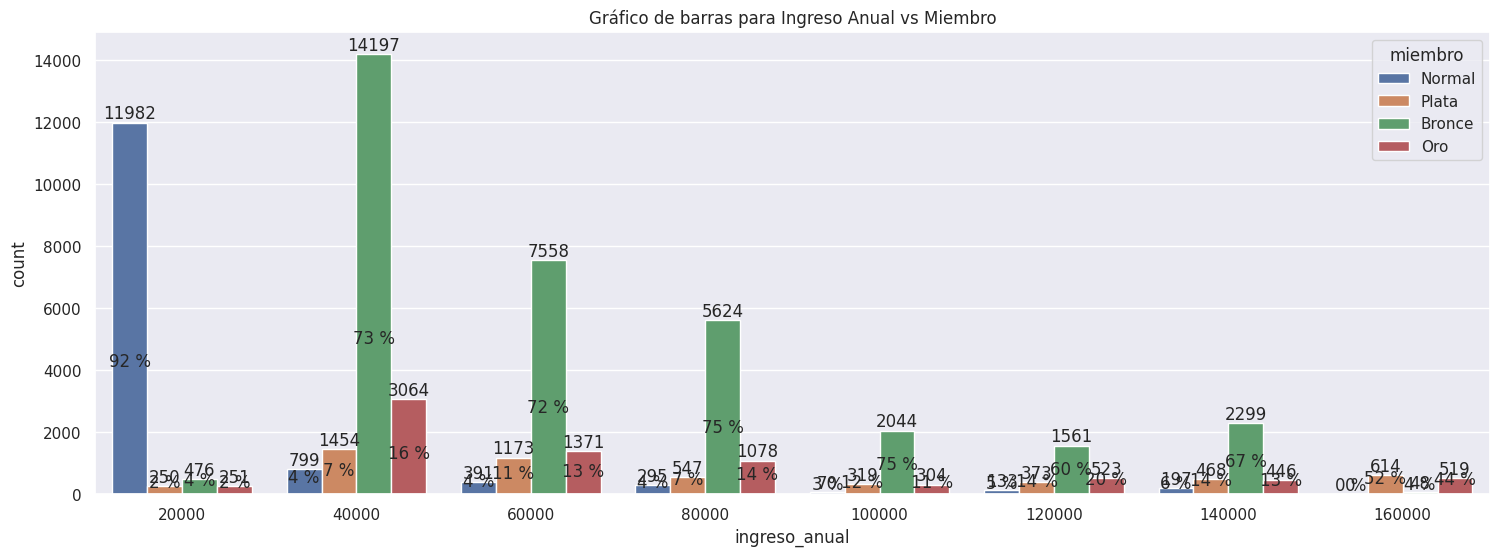

In [ ]:
# Gráfico de Barras : Ingreso Anual (X) , Miembro (Y)
plt.figure(figsize=(18,6))
grafico = sns.countplot(data=dataset, x= dataset['ingreso_anual'],hue = dataset['miembro'])

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,4):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################


for dato in grafico.containers:
  i=1
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[4*i-1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico de barras para Ingreso Anual vs Miembro')
plt.show()




**ANALISIS DE DATOS: PARA EL INGRESO ANUAL DE 20 000 USD , HAY UNA PREPONDERANCIA DE LA CATEGORÍA NORMAL, CON UN 92 % . EN EL RANGO ENTRE 40 000 Y 100 000 USD DE INGRESO ANUAL, LA CATEGORÍA BRONCE TIENE UN PROMEDIO DE 73.75 % , LA CATEGORÍA ORO TIENE UN 13.5 %, SUPERANDO A LA CATEGORÍA PLATA QUE TIENE 9.25 %. EN LOS SEGMENTOS ENTRE 120 000 Y 140 000 USD EL PROMEDIO DE LA CATEGORÍA BRONCE ES DE 63.5 % , PARA LA CATEGORÍA ORO SE TIENE UN 16.5 % EN PROMEDIO. PARA EL SEGMENTO DE 160 000 USD YA DESAPARECE LA CATEGORÍA BRONCE Y LOS VALORES DE REPARTEN MAYORMENTE ENTRE LAS CATEGORÍAS PLATA CON UN 52 % Y ORO CON UN 44 %.**
**ENTRE LOS RANGOS DE 40 000 Y 140 000 USD SE PUEDEN ENFOCAR LOS ESFUERZOS PARA FACILITAR EL CAMBIO DE CATEGORÍA DESDE BRONCE A LA PLATA Y ORO.**

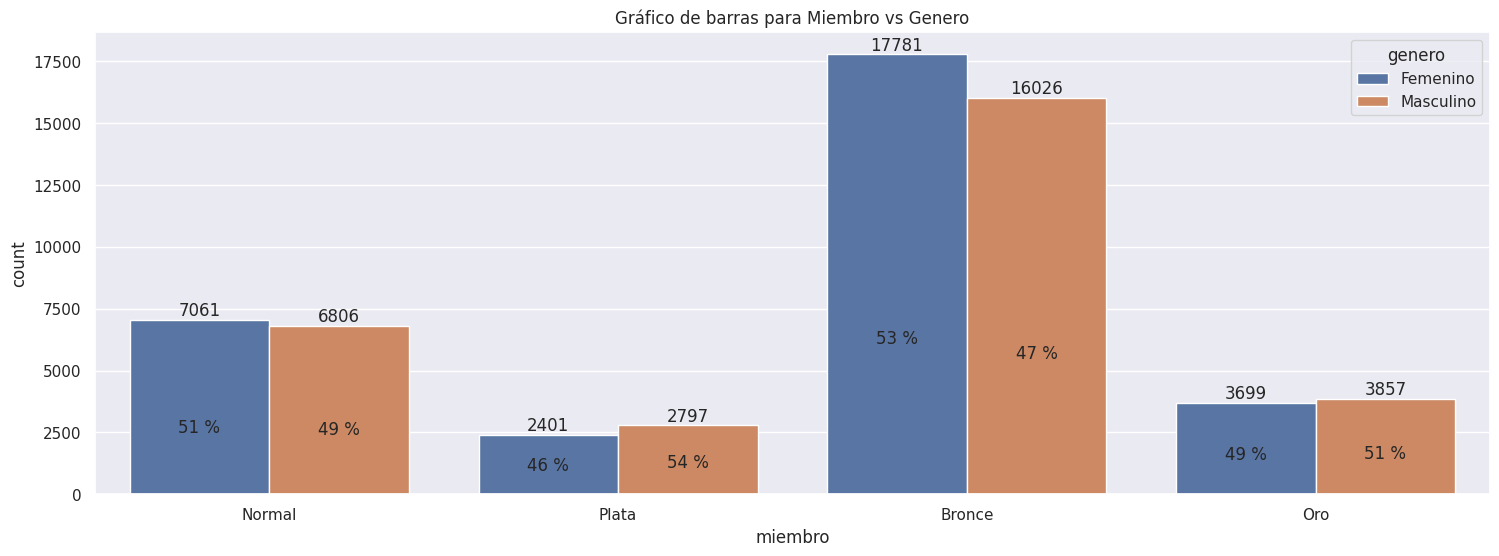

In [ ]:
# Gráfico de Barras : Miembro (X) , Genero (Y)
plt.figure(figsize=(18,6))
grafico = sns.countplot(data=dataset, x= dataset['miembro'],hue = dataset['genero'])


###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################


for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico de barras para Miembro vs Genero')
plt.show()

**ANALISIS DE DATOS: SI SE TOMAN TODAS LAS CATEGORÍAS Y SE SACAN LOS PROMEDIOS SE OBTIENE 49.75 % PARA EL GÉNERO FEMENINO Y 50.25 % PARA EL GÉNERO MASCULINO. LOS VALORES SON PRÁCTICAMNTE IGUALES.**

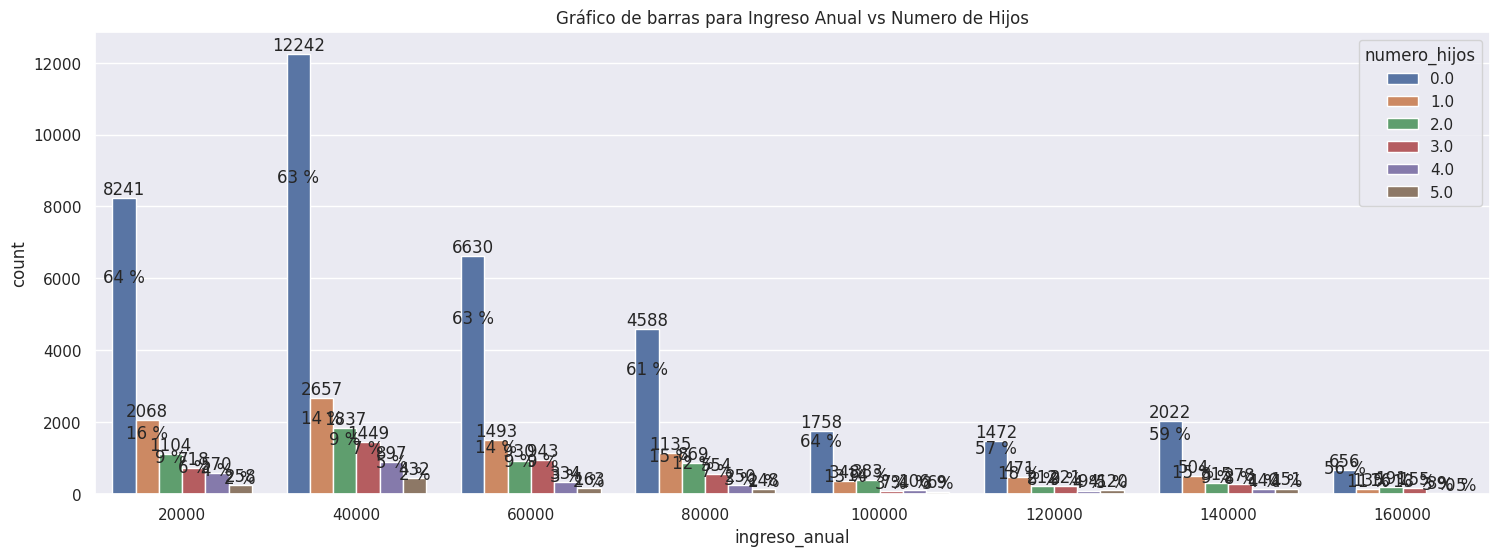

In [ ]:
# Gráfico de Barras :  (X) , Numero de hijos (Y)
plt.figure(figsize=(18,6))
grafico = sns.countplot(data=dataset, x= dataset['ingreso_anual'],hue = dataset['numero_hijos'])


###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,6):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################


for dato in grafico.containers:
  i=1
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, 7*height/10, f'{100*height/suma2[6*i-1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico de barras para Ingreso Anual vs Numero de Hijos')
plt.show()


**ANÁLISIS DE DATOS: EN EL RANGO ENTRE 20 000 USD Y 80 000 USD EL PROMEDIO DE PERSONAS QUE TIENEN UN SOLO HIJO ES DE 62.75 % . PARA EL RANGO ENTRE LOS 100 000 Y LOS 160 000 USD EL PROMEDIO ES DE 58.75 %. LO QUE MUESTRA QUE HAY UNA DIFERENCIA PERO PUEDE QUE NO TENGA LA PROPORCIÓN REQUERIDA COMO PARA HACER UNA CAMPAÑA EN BASE A ESTE VALOR.**

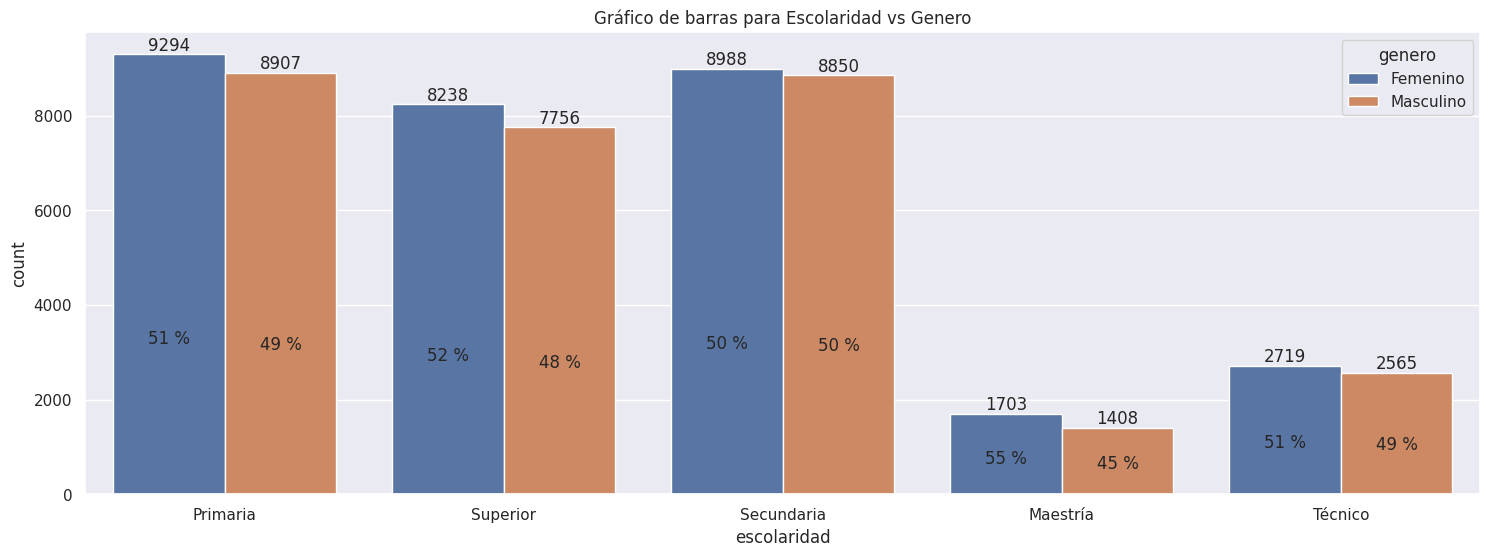

In [ ]:
# Gráfico de Barras : Escolaridad (X) , genero (Y)
plt.figure(figsize=(18,6))
grafico = sns.countplot(data=dataset, x= dataset['escolaridad'],hue = dataset['genero'])

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################




for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico de barras para Escolaridad vs Genero')
plt.show()

**ANALISIS DE DATOS: CONSIDERANDO TODOS LOS NIVELES EDUCACIONALES EL PROMEDIO PARA EL GÉNERO FEMENINO ES DE 51.8 % , MIENTRAS QUE PARA EL GÉNERO MÁSCULINO ES DE 48.2 %. POR LO QUE NO SE PUEDEN ESTABLECER DIFERENCIAS CON RESPECTO A LA EDUCACIÓN QUE HAYAN RECIBIDO. EN LA MAESTRÍA LAS MUJERES LOGRAN UNA MAYOR DIFERENCIA, PERO ESO SE CONTRAPESA CON EL NÚMERO REDUCIDO QUE REPRESENTA CON RESPECTO AL TOTAL.**

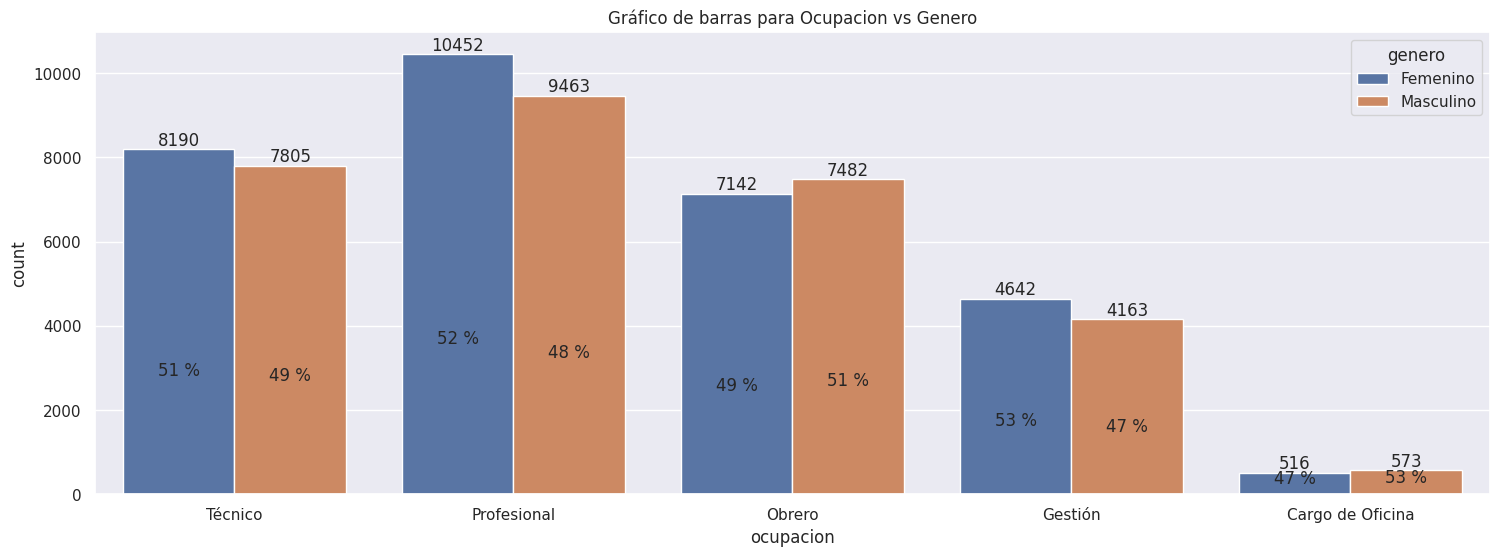

In [ ]:
# Gráfico de Barras : Ocupacion (X) , genero (Y)
plt.figure(figsize=(18,6))
grafico = sns.countplot(data=dataset, x= dataset['ocupacion'],hue = dataset['genero'])

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################


for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico de barras para Ocupacion vs Genero')
plt.show()

**ANALISIS DE DATOS: SE SE PROMEDIAN LAS OCUPACIONES PROFESIONAL Y GESTIÓN, SE TIENE UN PROMEDIO DEL GÉNERO FEMENINO DEL 52.5% MIENTRAS QUE EL GÉNERO MASCULINO TIENE UN PROMEDIO DE 47.5 %. ES UN VALOR DEL 5 % DE DIFERENCIA, PERO POR EL PODER ADQUISITVO QUE TIENEN, ES ACONSEJABLE ENFOCAR UN TIPO DE ESFUERZOS EN MEJORAR EL SERVICIO AL GÉNERO FEMENINO DE MANERA QUE COMPREN MÁS Y DE INCENTIVAR A SU VEZ AL GÉNERO MASCULINO CON MEJORES Y MÁS ATRACTIVAS OFERTAS.**

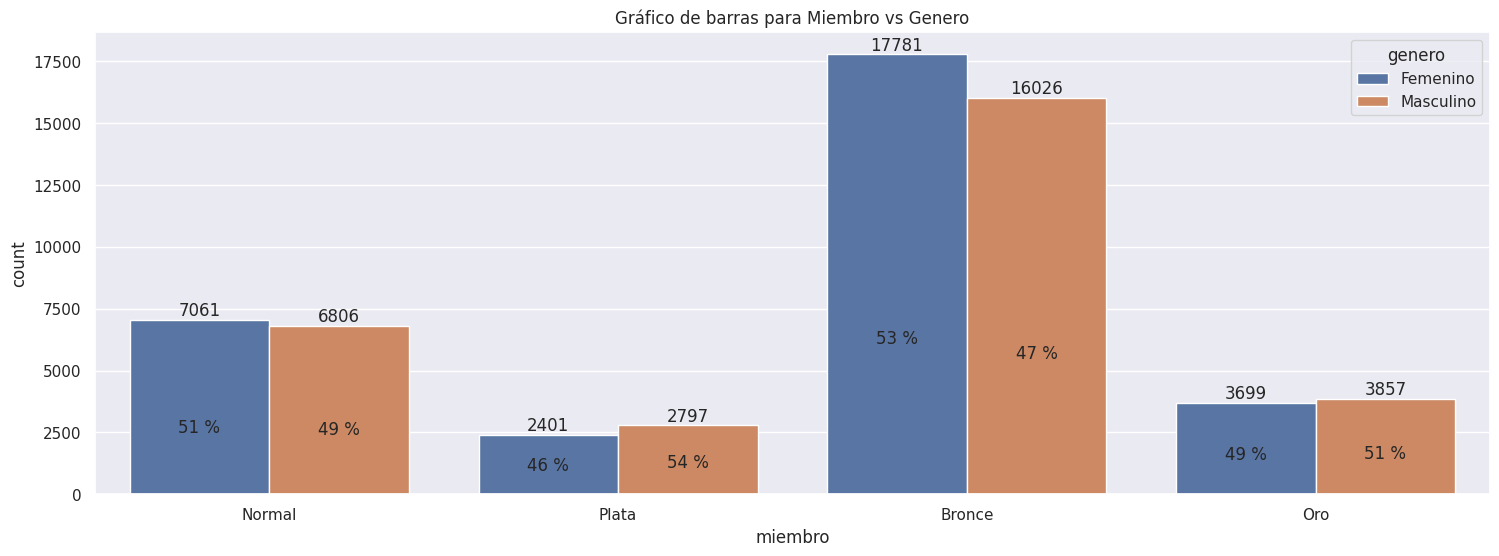

In [ ]:
# Gráfico de Barras : Miembro (X) , Genero (Y)
plt.figure(figsize=(18,6))
grafico = sns.countplot(data=dataset, x= dataset['miembro'],hue = dataset['genero'])


###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################



for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico de barras para Miembro vs Genero')
plt.show()

**ANÁLISIS DE DATOS: EN LAS CATEGORÍAS NORMAL Y ORO EL PROCENTAJE ES MUY SIMILAR ENTRE AMBOS GÉNEROS. HAY DIFERENCIAS EN LA CATEGORÍA PLATA, CON 46 % DE GÉNERO FEMENINO Y 54 % DE GÉNERO MASCULINO. ES INTERESANTE QUE PARA LA CATEGORÍA BRONCE SON CASI LOS MISMOS VALORES INVERTIDOS, ES DECIR: 53%  PARA EL GÉNERO FEMENINO Y 47% PARA EL GÉNERO MASCULINO. POR LO QUE SE PUEDE HACER CAMPAÑA DE MEJORA DE SERVICIOS PARA EL GÉNERO FEMENINO EN LA CATEGORÍA PLATA Y LO MISMO PARA EL GÉNERO MASCULINO EN LA CATEGORÍA BRONCE. Y POR SU PUESTO ESTO APOYADO CON UNA ESTRATEGIA PARA QUE EL OTRO GÉNERO TAMBIÉN INCREMENTE SUS COMPRAS EN AMBAS CATEGORÍAS.**

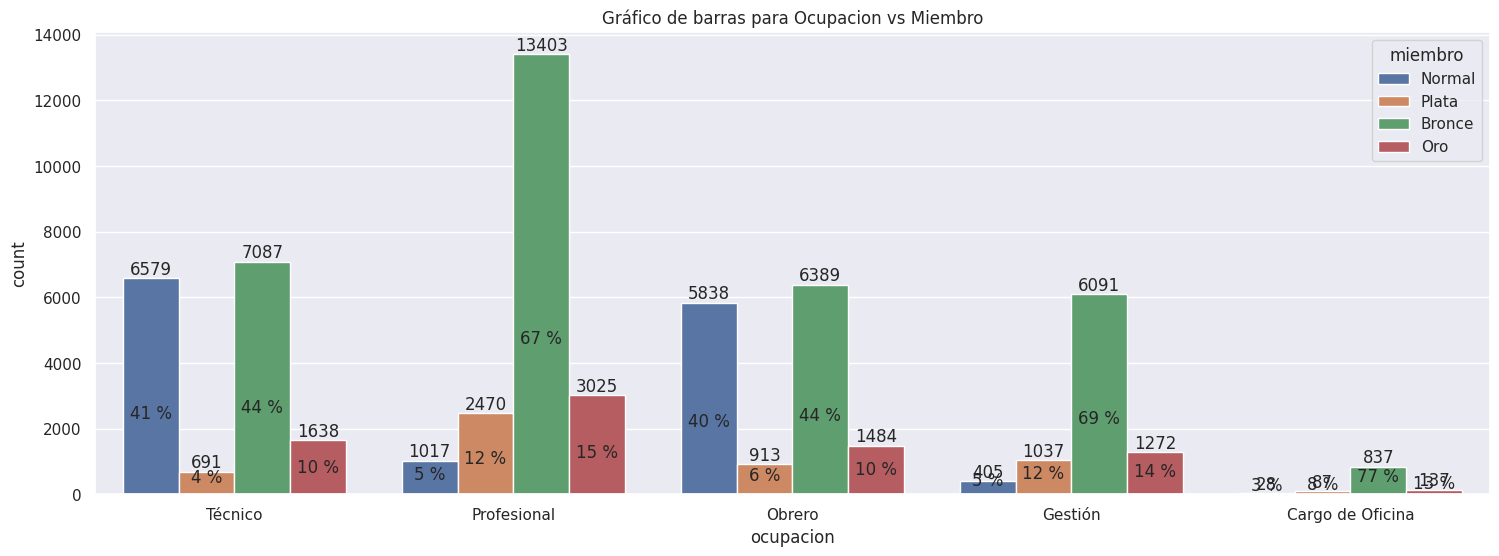

In [ ]:
# Gráfico de Barras : Ocupacion (X) , Miembro (Y)
plt.figure(figsize=(18,6))
grafico = sns.countplot(data=dataset, x= dataset['ocupacion'],hue = dataset['miembro'])

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,4):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################



for dato in grafico.containers:
  i=1
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[4*i-1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico de barras para Ocupacion vs Miembro')
plt.show()

**ANÁLISIS DE DATOS:  EN LAS OCUPACIONES PROFESIONAL Y GESTIÓN SE TIENE UN PROMEDIO DE 68 % PARA LA CATEGORÍA BRONCE , CON UN 12% PARA LA CATEGORÍA PLATA Y UN 14.5 % PARA LA CATEGORÍA ORO.  SE PUEDE HACER CAMPAÑA PARA QUE PASEN DE LA CATEGORÍA BRONCE A LA PLATA Y ORO MEDIANTE OFERTAS Y MEJORA DE SERVICIO.**

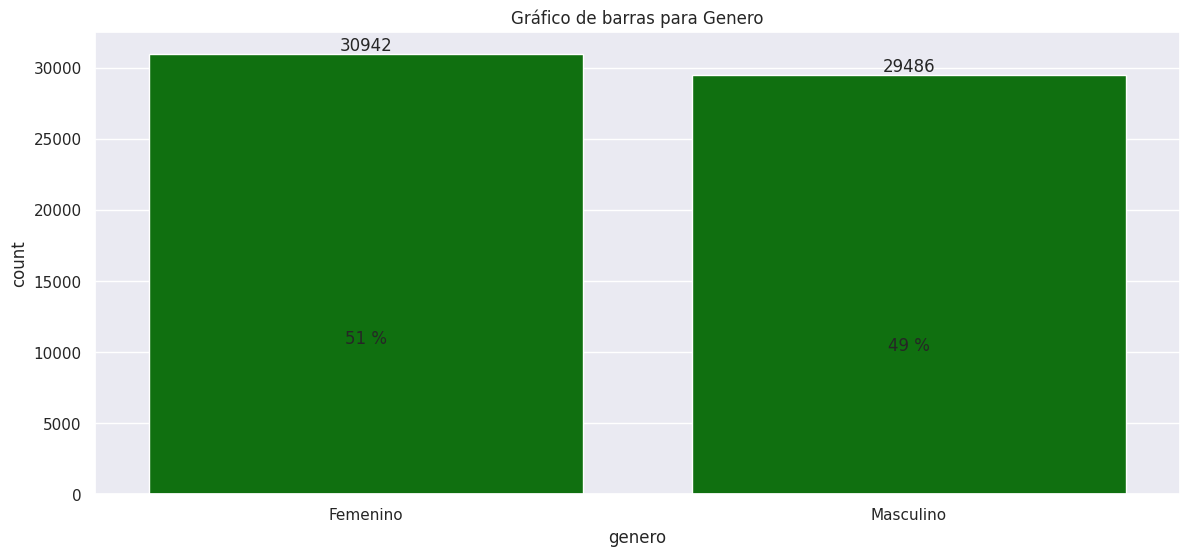

In [ ]:
# Gráfico de barras de Genero-count
plt.figure(figsize=(14,6))
grafico = sns.countplot(data = dataset, x = dataset['genero'],color = 'green')

cantidad_de_personas = dataset['genero'].value_counts()[0] + dataset['genero'].value_counts()[1]

for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/cantidad_de_personas:.0f} %', ha = 'center', va= 'bottom')


plt.title('Gráfico de barras para Genero')
plt.show()


**ANÁLSIS DE DATOS: LOS DATOS PARA AMBOS GÉNEROS SON MUY SIMILIARES. POR LO QUE EN BASE A ESTE GRÁFICO NO SE PUEDE HACER ALGUNA RECOMENDACIÓN EN PARTICUPAR.**

# 4. Preprocesamiento y obtención de features

In [ ]:
#Selección de atributos
#Se toma variable df como dataset y se realiza una copia.

df = dataset.copy()


In [ ]:
##################################################################################################

 # AGREGAR MATRIZ DE CORR PARA TODOS LOS DATOS, INCLUYENDO  VALORES NUMÉRICOS Y CATEGORICOS
 # SE ELIMINAN DATOS PARA PERMITIR UN ANÁLISIS MÁS SIMPLIFICADO DE LA MATRIZ DE CORRELACION.
 # SE LLEVA A EXCEL PARA REVISIÓN Y ANÁLISIS.

tipos_datos = df.dtypes
tipos_datos = pd.DataFrame(tipos_datos)
tipos_datos['COLUMNA']=tipos_datos.index


categoricos=[]
numericos=[]
for i in range(0, (df.shape[1])):
  if tipos_datos[0][i]=='object':
    categoricos.append(tipos_datos['COLUMNA'][i])
  else:
    numericos.append(tipos_datos['COLUMNA'][i])

categoricos.remove('ciudad')
categoricos.remove('marca')
categoricos.remove('divulgacion')
categoricos.remove('estado')
categoricos.remove('categoria_alimento')
categoricos.remove('promocion')

numericos.remove('ventas_tienda(en millones)')
numericos.remove('costo_tienda(en millones)')
numericos.remove('ventas_unitarias(en millones)')

numericos.remove('pies_cuadrados_comestibles')
numericos.remove('pies_cuadrados_congelados')
numericos.remove('pies_cuadrados_carne')

df_categoricos = df[categoricos]

df_numericos = df[numericos]

#######################################################################################################

df_total_dummies = pd.get_dummies(df_categoricos,columns=categoricos)

df_total_concatenado = pd.concat([df_numericos,df_total_dummies],axis=1)

X_total= pd.DataFrame(df_total_concatenado)


# Normalización de datos por medio de StandardScaler

from sklearn.preprocessing import StandardScaler
standard_scaler= StandardScaler()
X_std_total= standard_scaler.fit_transform(X_total)
X_std_total= pd.DataFrame(X_std_total, columns = X_total.columns)


matriz_correlacion_total = X_std_total.corr()

matriz_correlacion_total.drop('promedio_autos(aprox)', axis=0, inplace=True)
matriz_correlacion_total.drop('promedio_autos(aprox)', axis=1, inplace=True)


def color_texto(val):
  if val > 0.15:
    color = 'color:red'
  else:
    color = 'color:blue'

  return f'{color};'

#SE APLICA CAMBIO DE COLOR A VALORES SOBRE 0.15
matriz_color = matriz_correlacion_total.style.applymap(color_texto)

#SE IMPRIME

matriz_color

##########################################################################################################


,total_de_hijos,ingreso_anual,numero_hijos,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,pies_cuadrados_tienda,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,costo,departamento_Alimentos congelados,departamento_Alimentos enlatados,departamento_Alimentos para el desayuno,departamento_Alimentos para picar,departamento_Alimentos ricos en almidón,departamento_Artículos para el hogar,departamento_Bebidas,departamento_Bebidas alcohólicas,departamento_Caja de salida,departamento_Carne,departamento_Carrusel,departamento_Charcutería,departamento_Huevos,departamento_Mariscos,departamento_Productos enlatados,departamento_Productos frescos,departamento_Productos horneados,departamento_Productos lácteos,departamento_Productos para hornear,departamento_Publicaciones periódicas,departamento_Salud e higiene,departamento_Snacks,tipo_Bebida,tipo_Comida,tipo_No comestible,pais_Canadá,pais_Estados Unidos,pais_México,estado_civil_Casado,estado_civil_Soltero,genero_Femenino,genero_Masculino,escolaridad_Maestría,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico,miembro_Bronce,miembro_Normal,miembro_Oro,miembro_Plata,ocupacion_Cargo de Oficina,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico,vivienda_propia_No,vivienda_propia_Sí,comercio_Pequeño supermercado,comercio_Supermercado,comercio_Supermercado de lujo,comercio_Supermercado gourmet,comercio_Supermercado mediano
total_de_hijos,1.000000,-0.003574,0.394709,0.000545,-0.000186,0.000142,0.002794,-0.002824,0.002307,0.000555,0.002836,-0.000591,-0.013764,-0.013764,-0.003361,-0.003900,0.001416,-0.007026,0.001344,0.006421,0.002417,0.001245,-0.002505,-0.004639,-0.000634,0.006484,-0.004034,0.000746,-0.001360,0.002800,-0.005416,-0.003866,-0.000940,-0.000383,0.002080,-0.001448,0.003361,0.001192,-0.004500,0.001300,0.001819,0.005415,-0.026422,0.024913,0.037531,-0.037531,0.029701,-0.029701,-0.021956,-0.023869,0.079583,-0.031360,-0.023588,-0.118126,-0.040097,0.223642,0.005462,0.006312,-0.002542,0.001312,-0.016801,0.016756,-0.010928,0.010928,0.003662,-0.014326,0.017056,-0.012893,0.010253
ingreso_anual,-0.003574,1.000000,0.033986,-0.002422,0.003982,0.003791,0.003724,-0.000387,-0.003622,0.003725,0.003800,0.015738,-0.002124,-0.002124,0.020236,-0.008813,0.002884,0.002859,0.001029,-0.001848,0.003224,0.003385,-0.006431,-0.001194,0.002476,-0.007089,-0.000303,-0.004845,0.000613,-0.005530,-0.002177,-0.001027,-0.003205,-0.000090,0.005222,0.001891,0.001292,-0.000362,-0.004910,-0.000745,0.004464,-0.002315,-0.000119,0.001388,0.023724,-0.023724,-0.005340,0.005340,0.268211,-0.331295,-0.019456,0.243952,-0.021331,0.213054,-0.479120,0.130453,0.187411,-0.059288,0.319915,-0.393171,0.531718,-0.422798,-0.149087,0.149087,-0.012605,0.000483,0.006667,-0.002168,-0.002764
numero_hijos,0.394709,0.033986,1.000000,-0.000477,-0.002480,-0.002535,0.001380,-0.001818,0.000118,0.006150,-0.016873,-0.013750,-0.023680,-0.023680,-0.008918,-0.002549,-0.000740,0.002248,0.004028,0.000946,0.000496,0.002826,0.000720,0.003992,0.003463,0.001069,0.002793,-0.007651,0.004737,-0.001618,0.000667,-0.004666,-0.003688,-0.004039,-0.002834,-0.004877,0.009179,0.000601,0.002883,-0.008326,0.007419,0.005357,-0.011349,0.009049,0.639268,-0.639268,0.018421,-0.018421,-0.022931,-0.017075,0.036298,-0.017833,0.014909,-0.309291,-0.034077,0.494451,0.015442,0.009529,0.005238,-0.013056,0.019460,-0.015122,-0.217059,0.217059,0.000640,0.005833,0.007772,-0.025085,0.004715
precio_recomendado,0.000545,-0.002422,-0.000477,1.000000,0.043332,0.038639,0.042013,-0.005527,-0.011951,0.001663,-0.000014,0.002031,0.002811,0.002811,0.003998,0.002082,-0.019295,-0.012018,-0.003273,0.041060,0.020007,0.041384,-0.016529,-0.012913,-0.002529,-0.003861,-0.016499,-0.004534,0.009663,-0.000588,-0.025549,0.018242,0.003014,0.017579,-0.056752,-0.003141,-0.023067,-0.001540,-0.044686,0.016835,0.013566,-0.001507,0.001635,-0.000903,0.000570,-0.000570,0.003500,-0.003500,-0.004183,0.00388

## Transformación y selección de atributos

In [ ]:
# EN BASE A UNA REVISION DE LA MATRIZ DE CORRELACION ANTERIORMENTE OBTENIDA SE VAN PROBANDO DIFERENTES COMBINACIONES DE VARIBLES
# HASTA QUE SE OPTA POR LA QUE SE PRESENTA, QUE MUESTRA VALORES ACEPTABLES PARA LAS MÉTRICAS.

df1 = df[['comida_preparada','comercio','pais','barra_de_ensaladas']]

df_dumies = pd.get_dummies(df1,columns=['comida_preparada','comercio','pais','barra_de_ensaladas'])

df_concatenado = pd.concat([df[['pies_cuadrados_tienda','ingreso_anual']],df_dumies],axis=1)

X= pd.DataFrame(df_concatenado)


## Estandarización de los datos

In [ ]:

# Normalización de datos por medio de StandardScaler

from sklearn.preprocessing import StandardScaler
standard_scaler= StandardScaler()
X_std = standard_scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = X.columns)
X_std

,pies_cuadrados_tienda,ingreso_anual,comida_preparada_0.0,comida_preparada_1.0,comercio_Pequeño supermercado,comercio_Supermercado,comercio_Supermercado de lujo,comercio_Supermercado gourmet,comercio_Supermercado mediano,pais_Canadá,pais_Estados Unidos,pais_México,barra_de_ensaladas_0.0,barra_de_ensaladas_1.0
0,-0.051654,-1.061471,-0.837143,0.837143,-0.181784,-0.874667,1.277720,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,-0.837143,0.837143
1,-0.051654,0.046757,-0.837143,0.837143,-0.181784,-0.874667,1.277720,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,-0.837143,0.837143
2,-0.051654,-1.061471,-0.837143,0.837143,-0.181784,-0.874667,1.277720,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,-0.837143,0.837143
3,-0.051654,-0.507357,-0.837143,0.837143,-0.181784,-0.874667,1.277720,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,-0.837143,0.837143
4,-0.051654,-0.507357,-0.837143,0.837143,-0.181784,-0.874667,1.277720,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,-0.837143,0.837143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,-0.966585,-1.061471,1.194540,-1.194540,5.501023,-0.874667,-0.782644,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,1.194540,-1.194540
60424,-0.966585,-0.507357,1.194540,-1.194540,5.501023,-0.874667,-0.782644,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,1.194540,-1.194540
60425,-0.966585,-0.507357,1.194540,-1.194540,5.501023,-0.874667,-0.782644,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,1.194540,-1.194540
60426,1.133757,0.600871,1.194540,-1.194540,-0.181784,-0.874667,-0.782644,-0.347266,4.498067,3.774149,-1.343840,-0.640331,1.194540,-1.194540


# 5. Clusterización y validación

## Clusterización

In [ ]:
# Para proceder a la Clusterización se usará el algoritmo KMeans

In [ ]:
dataset_para_cluster_final_std = X_std
dataset_para_cluster_final_std

,pies_cuadrados_tienda,ingreso_anual,comida_preparada_0.0,comida_preparada_1.0,comercio_Pequeño supermercado,comercio_Supermercado,comercio_Supermercado de lujo,comercio_Supermercado gourmet,comercio_Supermercado mediano,pais_Canadá,pais_Estados Unidos,pais_México,barra_de_ensaladas_0.0,barra_de_ensaladas_1.0
0,-0.051654,-1.061471,-0.837143,0.837143,-0.181784,-0.874667,1.277720,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,-0.837143,0.837143
1,-0.051654,0.046757,-0.837143,0.837143,-0.181784,-0.874667,1.277720,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,-0.837143,0.837143
2,-0.051654,-1.061471,-0.837143,0.837143,-0.181784,-0.874667,1.277720,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,-0.837143,0.837143
3,-0.051654,-0.507357,-0.837143,0.837143,-0.181784,-0.874667,1.277720,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,-0.837143,0.837143
4,-0.051654,-0.507357,-0.837143,0.837143,-0.181784,-0.874667,1.277720,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,-0.837143,0.837143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,-0.966585,-1.061471,1.194540,-1.194540,5.501023,-0.874667,-0.782644,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,1.194540,-1.194540
60424,-0.966585,-0.507357,1.194540,-1.194540,5.501023,-0.874667,-0.782644,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,1.194540,-1.194540
60425,-0.966585,-0.507357,1.194540,-1.194540,5.501023,-0.874667,-0.782644,-0.347266,-0.222318,-0.264960,0.744136,-0.640331,1.194540,-1.194540
60426,1.133757,0.600871,1.194540,-1.194540,-0.181784,-0.874667,-0.782644,-0.347266,4.498067,3.774149,-1.343840,-0.640331,1.194540,-1.194540


In [ ]:
#corr = dataset_para_cluster_final_std.corr()
#corr.style.background_gradient(cmap='RdYlGn')

## Validación

##Número de Cluster

In [ ]:

from sklearn.cluster import KMeans
from sklearn import metrics


metricas=[]

Y_silhouette=[]

for s in range(3,11):

  metricas_dic={}


  kmeans = KMeans(n_clusters=s,n_init=10,random_state=42, max_iter = 300)
  y_prediccion = kmeans.fit_predict(dataset_para_cluster_final_std)
  labels = kmeans.labels_

  metricas_dic['Numero de Clusters'] = s

  metricas_dic['Silhouette'] = metrics.silhouette_score(dataset_para_cluster_final_std,labels, metric='euclidean')
  metricas_dic['Davies-Bouldin'] = metrics.davies_bouldin_score(dataset_para_cluster_final_std,labels)
  metricas_dic['Calinski-Harabasz'] = metrics.calinski_harabasz_score(dataset_para_cluster_final_std,labels)

  Y_silhouette.append(metricas_dic['Silhouette']) #######

  metricas.append(metricas_dic)

tabla = pd.DataFrame(metricas)

print(tabla)




   Numero de Clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz
0                   3    0.467892        0.858454       29562.845127
1                   4    0.470576        0.908637       29078.094059
2                   5    0.508343        0.814281       30282.043146
3                   6    0.524980        0.907725       34339.961852
4                   7    0.582629        0.691026       43725.605434
5                   8    0.620467        0.654742       48755.506728
6                   9    0.537088        0.751427       49387.384068
7                  10    0.569674        0.643802       51607.577727


In [ ]:
#Se verifica la dimensión del los datos normalizados para pasar a la siguiente etapa del ejercicio.
dataset_para_cluster_final_std.shape

(60428, 14)

## Estructura

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

random_data = np.random.rand(60428,14)

metricas =[]

Y_silhouette_random =[]

for s in range(3,11):
  metricas_dic={}
  kmeans = KMeans(n_clusters=s, n_init=10,random_state=42, max_iter=300)
  y_pred = kmeans.fit_predict(random_data)
  labels = kmeans.labels_

  metricas_dic['N_Clusters']=s

  metricas_dic['Silhouette'] = metrics.silhouette_score(random_data, labels,metric='euclidean')
  metricas_dic['Davies_Bouldin'] = metrics.davies_bouldin_score(random_data, labels)
  metricas_dic['Calinski-Harabasz'] = metrics.calinski_harabasz_score(random_data, labels)

  Y_silhouette_random.append(metricas_dic['Silhouette'])

  metricas.append(metricas_dic)

random_table = pd.DataFrame(metricas)

print(random_table)



   N_Clusters  Silhouette  Davies_Bouldin  Calinski-Harabasz
0           3    0.044938        3.748177        2865.961517
1           4    0.045142        3.657864        2563.483241
2           5    0.044324        3.310649        2305.268088
3           6    0.043986        3.108462        2125.329740
4           7    0.044286        2.984274        1987.682579
5           8    0.045027        2.854950        1876.381080
6           9    0.044453        2.770345        1773.155647
7          10    0.044400        2.729888        1686.111056


Text(0, 0.5, 'Valores de la métrica de Silhouette')

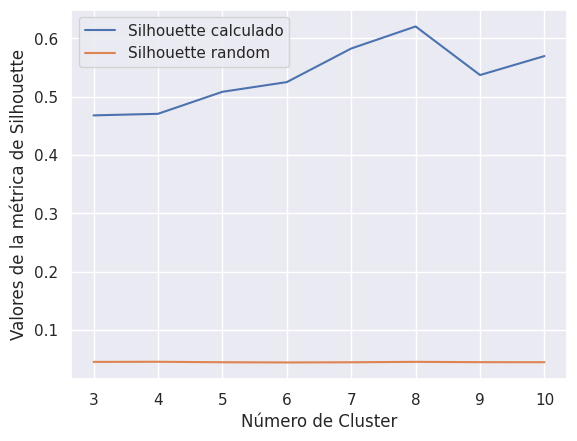

In [ ]:
vx = len(Y_silhouette)
valores_x = []
for i in range(3,11):
  valores_x.append(i)

valores_y1 = Y_silhouette
valores_y2 = Y_silhouette_random

# creación de un dataframe

df_grafico = pd.DataFrame({'X':valores_x,'Y1':valores_y1,'Y2':valores_y2})

sns.set(style="darkgrid")
sns.lineplot(x='X',y='Y1',data = df_grafico,label = 'Silhouette calculado')
sns.lineplot(x='X',y='Y2',data=df_grafico,label='Silhouette random')

plt.xlabel('Número de Cluster')
plt.ylabel('Valores de la métrica de Silhouette')


In [ ]:
Y1 = np.array(valores_y1)
Y2= np.array(valores_y2)

suma=0

import numpy as np

# Se procedes a analizar el porcentaje de diferencia entre ambas columnas de los valores de la métrica de Silhouette

for i in range(0,len(Y1)):
    if(Y1[i]>=Y2[i]):
      porcentaje_de_variacion = 100*np.abs(Y1[i]-Y2[i])/abs(Y2[i])
    else:
      porcentaje_de_variacion = 100*np.abs(Y2[i]-Y1[i])/abs(Y1[i])

    suma = suma + porcentaje_de_variacion

suma = suma/len(Y1)

print(f"El porcentaje de variación es {round(suma,2)} %")



El porcentaje de variación es 1101.11 %


## Estabilidad

In [ ]:
set1,set2,set3 = np.array_split(dataset_para_cluster_final_std,3)
sets = [set1,set2,set3]

metricas =[]
n=1

for set_ in sets:
  metricas_dic={}

  kmeans=KMeans(n_clusters=7, n_init=10,random_state=42, max_iter=300)
  y_pred = kmeans.fit_predict(set_)
  labels = kmeans.labels_

  metricas_dic['Set'] = f'set{n}'
  n=n+1

  metricas_dic['Silhouette']=metrics.silhouette_score(set_,labels,metric='euclidean')
  metricas_dic['Davies_Bouldin'] = metrics.davies_bouldin_score(set_,labels)
  metricas_dic['Calinski-Harabasz'] = metrics.calinski_harabasz_score(set_,labels)

  metricas.append(metricas_dic)

estability_table = pd.DataFrame(metricas)
estability_table


,Set,Silhouette,Davies_Bouldin,Calinski-Harabasz
0,set1,0.583724,0.686248,14593.037664
1,set2,0.583080,0.693015,14634.965041
2,set3,0.581100,0.693410,14498.890285


In [ ]:
# Se determina la variación porcentual entre los elemenos de las columnas:
# la comparación parte con el primer valor, que como es el valor de comparación inicial, se toma como NaN
# luego se calcula el porcentaje de variación del siguiente valor con respecto al primer dato de la columna.
# posteriormente se calcular la variación porcentual del tercer valor con respecto al segundo de la columna y así en forma sucesiva.
# se cumple que todos son menores que el 5%.
# NO SE SUPEREA EL 1 %

variacion = estability_table[['Silhouette','Davies_Bouldin','Calinski-Harabasz']].pct_change()*100
variacion

,Silhouette,Davies_Bouldin,Calinski-Harabasz
0,NaN,NaN,NaN
1,-0.110413,0.985977,0.287311
2,-0.339612,0.057018,-0.929792


## Instanciando la mejor configuración de clusters

In [ ]:
pd.set_option('display.max_columns',None)



In [ ]:
dataset.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,Normal,Técnico,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,Primaria,Normal,Obrero,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Obrero,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,Primaria,Bronce,Técnico,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
######################################################################################

# KMEANS SE EJECUTA UNA SOLA VEZ

kmeans = KMeans(n_clusters=7,n_init=10,random_state=42,max_iter=300)
y_pred = kmeans.fit_predict(dataset_para_cluster_final_std)
labels = kmeans.labels_

######################################################################################

In [ ]:
# SE AGREGA LA COLUMNA "CLUSTER"

dataset['CLUSTER'] = labels

dataset.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,CLUSTER
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,Normal,Técnico,Sí,1.0,20000,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62,1
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,4.0,60000,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86,1
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,Primaria,Normal,Obrero,No,1.0,20000,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16,1
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Obrero,Sí,2.0,40000,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78,1
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,Primaria,Bronce,Técnico,No,2.0,40000,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,1


In [ ]:
dataset.groupby('CLUSTER').describe()

ventas_tienda(en millones)                                        \
                             count      mean       std   min   25%   50%   
CLUSTER                                                                    
0                           2846.0  6.663159  3.506972  1.00  3.93  6.28   
1                          14633.0  6.609082  3.417991  1.00  3.96  6.08   
2                          11009.0  6.678546  3.444546  1.00  3.96  6.33   
3                          20120.0  6.668364  3.470667  1.00  3.93  6.24   
4                           6503.0  6.608458  3.450908  1.00  3.93  6.04   
5                           3384.0  6.627364  3.453946  1.00  3.96  6.16   
6                           1933.0  3.359524  2.002112  0.51  1.79  2.89   

                       costo_tienda(en millones)                              \
            75%    max                     count      mean       std     min   
CLUSTER                                                                        
0        8.7275  19.55                    2846.0  2.671127  1.471785  0.3536   
1        8.7300  19.90                   14633.0  2.651189  1.441627  0.3060   
2        8.7900  19.90                   11009.0  2.681337  1.458351  0.3286   
3        8.7900  19.85                   20120.0  2.663439  1.447052  0.3060   
4        8.7000  19.90                    6503.0  2.646335  1.456044  0.3240   
5        8.7300  22.92                    3384.0  2.653368  1.448553  0.3224   
6        4.5000  11.94                    1933.0  1.343241  0.826501  0.1632   

                                           ventas_unitarias(en millones)  \
              25%     50%      75%     max                         count   
CLUSTER                                                                    
0        1.551300  2.4341  3.54815  9.5305                        2846.0   
1        1.550400  2.4198  3.50880  9.4080                       14633.0   
2        1.574400  2.4464  3.52560  9.0160                       11009.0   
3        1.539000  2.4288  3.53865  9.5040                       20120.0   
4        1.537500  2.4128  3.52120  9.7265                        6503.0   
5        1.537125  2.4320  3.48880  9.0850                        3384.0   
6        0.716000  1.1592  1.79100  5.3325                        1933.0   

                                                     total_de_hijos            \
             mean       std  min  25%  50%  75%  max          count      mean   
CLUSTER                                                                         
0        3.161982  0.795048  2.0  3.0  3.0  4.0  5.0         2846.0  2.602600   
1        3.127315  0.779198  2.0  3.0  3.0  4.0  6.0        14633.0  2.475979   
2        3.149060  0.787253  2.0  3.0  3.0  4.0  6.0        11009.0  2.583704   
3        3.153877  0.792241  2.0  3.0  3.0  4.0  6.0        20120.0  2.551590   
4        3.118561  0.783911  2.0  3.0  3.0  4.0  6.0         6503.0  2.478548   
5        3.135934  0.809249  2.0  3.0  3.0  4.0  6.0         3384.0  2.548168   
6        1.622866  0.612190  1.0  1.0  2.0  2.0  3.0         1933.0  2.563890   

                                           promedio_autos(aprox)            \
              std  min  25%  50%  75%  max                 count      mean   
CLUSTER                                                                      
0        1.495810  0.0  1.0  3.0  4.0  5.0                2846.0  2.159171   
1        1.471801  0.0  1.0  2.0  4.0  5.0               14633.0  2.170847   
2        1.509632  0.0  1.0  3.0  4.0  5.0               11009.0  2.181488   
3        1.498387  0.0  1.0  3.0  4.0  5.0               20120.0  2.226342   
4        1.485331  0.0  1.0  3.0  4.0  5.0                6503.0  2.225127   
5        1.481200  0.0  1.0  2.0  4.0  5.0                3384.0  2.253251   
6        1.435169  0.0  1.0  2.0  4.0  5.0                1933.0  2.142783   

                                                                              \
             

In [ ]:
kmeans.cluster_centers_

array([[ 1.52158821, -0.01243164,  1.19453957, -1.19453957, -0.18178438,
        -0.87466716, -0.78264382, -0.34726563,  4.49806705,  0.558189  ,
        -1.34384017,  1.11293061,  1.19453957, -1.19453957],
       [ 0.86630567, -0.03022755, -0.83714263,  0.83714263, -0.18178438,
        -0.39875811,  0.7918107 , -0.34726563, -0.22231772, -0.26496042,
         0.74413612, -0.64033137, -0.83714263,  0.83714263],
       [ 0.64623031,  0.04751191, -0.83714263,  0.83714263, -0.18178438,
        -0.3942356 ,  0.78719316, -0.34726563, -0.22231772, -0.26496042,
        -1.34384017,  1.5616914 , -0.83714263,  0.83714263],
       [-0.76340933,  0.01156022,  1.19453957, -1.19453957, -0.18178438,
         1.14329203, -0.78264382, -0.34726563, -0.22231772, -0.26496042,
         0.58784922, -0.475508  ,  1.19453957, -1.19453957],
       [-0.74983636, -0.00624306, -0.83714263,  0.83714263, -0.18178438,
        -0.87466716, -0.78264382,  2.87964002, -0.22231772, -0.26496042,
        -0.01104153,  0.15

In [ ]:

n_clusters, n_features = kmeans.cluster_centers_.shape

print(n_clusters)
print(n_features)

7
14


In [ ]:
columnas_originales = dataset.columns
columnas_originales

Index(['categoria_alimento', 'departamento', 'tipo',
       'ventas_tienda(en millones)', 'costo_tienda(en millones)',
       'ventas_unitarias(en millones)', 'promocion', 'pais', 'estado_civil',
       'genero', 'total_de_hijos', 'escolaridad', 'miembro', 'ocupacion',
       'vivienda_propia', 'promedio_autos(aprox)', 'ingreso_anual',
       'numero_hijos', 'promedio_autos(aprox)', 'marca', 'precio_recomendado',
       'peso_bruto', 'peso_neto', 'empaque_reciclable', 'bajo_en_grasa',
       'unidades_por_caja', 'comercio', 'ciudad', 'estado',
       'pies_cuadrados_tienda', 'pies_cuadrados_comestibles',
       'pies_cuadrados_congelados', 'pies_cuadrados_carne', 'cafeteria',
       'tienda_de_videos', 'barra_de_ensaladas', 'comida_preparada',
       'floristeria', 'divulgacion', 'costo', 'CLUSTER'],
      dtype='object')

In [ ]:
for i in range(n_clusters):
  ici = np.argsort(np.abs(kmeans.cluster_centers_[i]))[::-1]
  columnas_importantes = columnas_originales[ici]
columnas_importantes

Index(['costo_tienda(en millones)', 'ocupacion', 'miembro',
       'ventas_tienda(en millones)', 'tipo', 'ventas_unitarias(en millones)',
       'promocion', 'categoria_alimento', 'pais', 'total_de_hijos', 'genero',
       'estado_civil', 'escolaridad', 'departamento'],
      dtype='object')

In [ ]:
columnas_importantes = list(columnas_importantes)
columnas_importantes = dataset[columnas_importantes]
columnas_importantes.head()

,costo_tienda(en millones),ocupacion,miembro,ventas_tienda(en millones),tipo,ventas_unitarias(en millones),promocion,categoria_alimento,pais,total_de_hijos,genero,estado_civil,escolaridad,departamento
0,2.7232,Técnico,Normal,7.36,Comida,4.0,Bolsas llenas,Alimentos para el desayuno,Estados Unidos,1.0,Femenino,Casado,Primaria,Alimentos congelados
1,2.5944,Profesional,Plata,5.52,Comida,3.0,Lotería de la caja registradora,Alimentos para el desayuno,Estados Unidos,0.0,Masculino,Casado,Superior,Alimentos congelados
2,1.3616,Obrero,Normal,3.68,Comida,2.0,Ahorro para apostadores grandes,Alimentos para el desayuno,Estados Unidos,4.0,Femenino,Soltero,Primaria,Alimentos congelados
3,1.1776,Obrero,Bronce,3.68,Comida,2.0,Lotería de la caja registradora,Alimentos para el desayuno,Estados Unidos,2.0,Femenino,Casado,Secundaria,Alimentos congelados
4,1.4280,Técnico,Bronce,4.08,Comida,3.0,Venta Doble,Alimentos para el desayuno,Estados Unidos,0.0,Masculino,Casado,Primaria,Alimentos congelados


In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = columnas_importantes.columns)
round(centroids.var(),3).sort_values(ascending=False)


tipo                             4.613
pais                             3.183
total_de_hijos                   2.269
categoria_alimento               1.488
miembro                          1.179
ventas_tienda(en millones)       1.179
escolaridad                      1.179
departamento                     1.179
costo_tienda(en millones)        0.937
genero                           0.923
promocion                        0.886
estado_civil                     0.774
ventas_unitarias(en millones)    0.544
ocupacion                        0.001
dtype: float64

In [ ]:
dataset['CLUSTER'] = labels
dataset.groupby('CLUSTER')['ocupacion','miembro','tipo','promocion','categoria_alimento','pais','genero','estado_civil','escolaridad','departamento','costo_tienda(en millones)','ventas_tienda(en millones)','ventas_unitarias(en millones)','total_de_hijos'].describe()




<ipython-input-122-88c5033f473d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset.groupby('CLUSTER')['ocupacion','miembro','tipo','promocion','categoria_alimento','pais','genero','estado_civil','escolaridad','departamento','costo_tienda(en millones)','ventas_tienda(en millones)','ventas_unitarias(en millones)','total_de_hijos'].describe()


costo_tienda(en millones)                                        \
                            count      mean       std     min       25%   
CLUSTER                                                                   
0                          2846.0  2.671127  1.471785  0.3536  1.551300   
1                         14633.0  2.651189  1.441627  0.3060  1.550400   
2                         11009.0  2.681337  1.458351  0.3286  1.574400   
3                         20120.0  2.663439  1.447052  0.3060  1.539000   
4                          6503.0  2.646335  1.456044  0.3240  1.537500   
5                          3384.0  2.653368  1.448553  0.3224  1.537125   
6                          1933.0  1.343241  0.826501  0.1632  0.716000   

                                 ventas_tienda(en millones)            \
            50%      75%     max                      count      mean   
CLUSTER                                                                 
0        2.4341  3.54815  9.5305                     2846.0  6.663159   
1        2.4198  3.50880  9.4080                    14633.0  6.609082   
2        2.4464  3.52560  9.0160                    11009.0  6.678546   
3        2.4288  3.53865  9.5040                    20120.0  6.668364   
4        2.4128  3.52120  9.7265                     6503.0  6.608458   
5        2.4320  3.48880  9.0850                     3384.0  6.627364   
6        1.1592  1.79100  5.3325                     1933.0  3.359524   

                                                    \
              std   min   25%   50%     75%    max   
CLUSTER                                              
0        3.506972  1.00  3.93  6.28  8.7275  19.55   
1        3.417991  1.00  3.96  6.08  8.7300  19.90   
2        3.444546  1.00  3.96  6.33  8.7900  19.90   
3        3.470667  1.00  3.93  6.24  8.7900  19.85   
4        3.450908  1.00  3.93  6.04  8.7000  19.90   
5        3.453946  1.00  3.96  6.16  8.7300  22.92   
6        2.002112  0.51  1.79  2.89  4.5000  11.94   

        ventas_unitarias(en millones)                                          \
                                count      mean       std  min  25%  50%  75%   
CLUSTER                                                                         
0                              2846.0  3.161982  0.795048  2.0  3.0  3.0  4.0   
1                             14633.0  3.127315  0.779198  2.0  3.0  3.0  4.0   
2                             11009.0  3.149060  0.787253  2.0  3.0  3.0  4.0   
3                             20120.0  3.153877  0.792241  2.0  3.0  3.0  4.0   
4                              6503.0  3.118561  0.783911  2.0  3.0  3.0  4.0   
5                              3384.0  3.135934  0.809249  2.0  3.0  3.0  4.0   
6                              1933.0  1.622866  0.612190  1.0  1.0  2.0  2.0   

             total_de_hijos                                               
         max          count      mean       std  min  25%  50%  75%  max  
CLUSTER                                                                   
0        5.0         2846.0  2.602600  1.495810  0.0  1.0  3.0  4.0  5.0  
1        6.0        14633.0  2.475979  1.471801  0.0  1.0  2.0  4.0  5.0  
2        6.0        11009.0  2.583704  1.509632  0.0  1.0  3.0  4.0  5.0  
3        6.0        20120.0  2.551590  1.498387  0.0  1.0  3.0  4.0  5.0  
4        6.0         6503.0  2.478548  1.485331  0.0  1.0  3.0  4.0  5.0  
5        6.0         3384.0  2.548168  1.481200  0.0  1.0  2.0  4.0  5.0  
6        3.0         1933.0  2.563890  1.435169  0.0  1.0  2.0  4.0  5.0

In [ ]:
description = round(dataset.groupby('CLUSTER')['ocupacion','miembro','tipo','promocion','categoria_alimento','pais','genero','estado_civil','escolaridad','departamento','costo_tienda(en millones)','ventas_tienda(en millones)','ventas_unitarias(en millones)','total_de_hijos'].mean(),2)
description

<ipython-input-123-49a28f9270af>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = round(dataset.groupby('CLUSTER')['ocupacion','miembro','tipo','promocion','categoria_alimento','pais','genero','estado_civil','escolaridad','departamento','costo_tienda(en millones)','ventas_tienda(en millones)','ventas_unitarias(en millones)','total_de_hijos'].mean(),2)
<ipython-input-123-49a28f9270af>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  description = round(dataset.groupby('CLUSTER')['ocupacion','miembro','tipo','promocion','categoria_alimento','pais','genero','estado_civil','escolaridad','departamento','costo_tienda(en millones)','ventas_tienda(en millones)','ventas_unitarias(en millones)','total_de_hijos'].

,costo_tienda(en millones),ventas_tienda(en millones),ventas_unitarias(en millones),total_de_hijos
CLUSTER,,,,
0,2.67,6.66,3.16,2.60
1,2.65,6.61,3.13,2.48
2,2.68,6.68,3.15,2.58
3,2.66,6.67,3.15,2.55
4,2.65,6.61,3.12,2.48
5,2.65,6.63,3.14,2.55
6,1.34,3.36,1.62,2.56


In [ ]:
description['N_CUSTOMER'] = dataset.CLUSTER.value_counts()
description

,costo_tienda(en millones),ventas_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,N_CUSTOMER
CLUSTER,,,,,
0,2.67,6.66,3.16,2.60,2846
1,2.65,6.61,3.13,2.48,14633
2,2.68,6.68,3.15,2.58,11009
3,2.66,6.67,3.15,2.55,20120
4,2.65,6.61,3.12,2.48,6503
5,2.65,6.63,3.14,2.55,3384
6,1.34,3.36,1.62,2.56,1933


**CLUSTER 0: MAYORES VENTAS UNITARIAS.
CLUSTER 2: MAYOR COSTO TIENDA / MAYOR VENTA TIENDA.
CLUSTER 6: MENOR COSTO TIENDA. / MENOR VENTA TIENDA / MENORES VENTAS UNITARIAS.**


In [ ]:
################################################################################################################
# EL ANÁLISIS ANTERIOR CONSISTENTE EN ESTUDIAR LA VARIACIÓN DEL CENTRO DE LOS CLUSTER, OCUPA 14
# DE LAS 40 VARIABLES DEL EJERCICIO.
# ENTREGAN INFORMACIÓN VALIOSA SOBRE EL COSTO_TIENDA, VENTAS_TIENDA, VENTAS_UNITARIAS.
################################################################################################################

In [ ]:
# SE ANALIZARÁ TAMBIÉN SEGÚN CONFIGURACIÓN POR CLUSTER Y CATEGORÍAS PARA COMPLEMENTAR AL ANÁLISIS ANTERIOR YA QUE DAN MAYOR CLARIDAD
# ESTO DEBIDO A QUE HAY MUCHA PRESENCIA DE VARIABLES CATEGÓRICAS.
#####################################################################################################################################


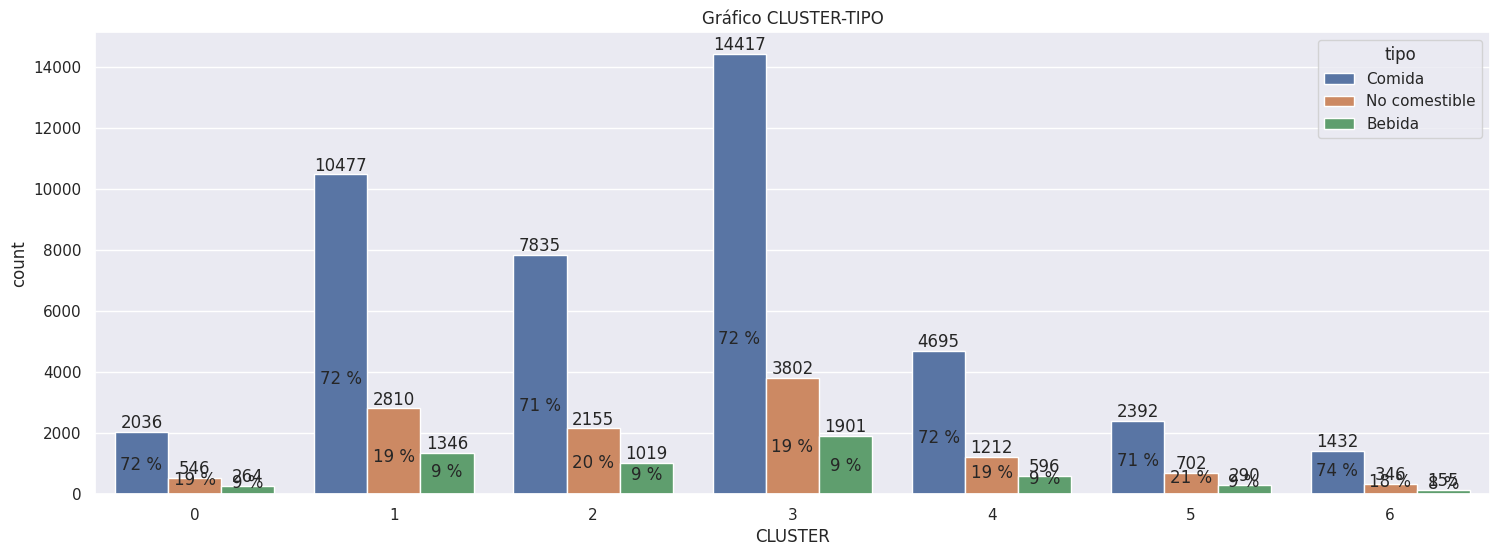

In [ ]:
#TIPO

plt.figure(figsize=(18,6))
grafico=sns.countplot(x=dataset['CLUSTER'], hue=dataset['tipo'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,3):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################


for dato in grafico.containers:
  i=1
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[3*i-1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-TIPO')
plt.show()

**NO SE PRESENTA UNA DIFERENCIA QUE SEA NOTORIA EN LA DISTRIBUCIÓN SEGÚN "TIPO" EN LOS CLUSTERS.**

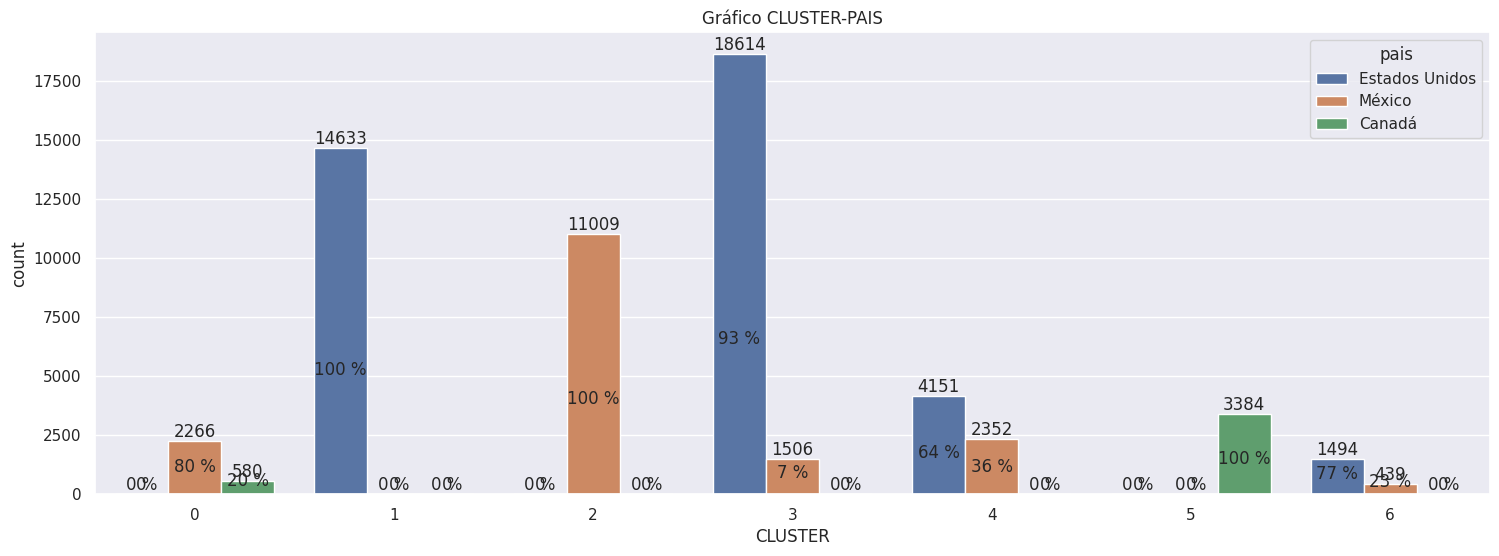

In [ ]:
#PAIS

plt.figure(figsize=(18,6))
grafico= sns.countplot(x=dataset['CLUSTER'], hue=dataset['pais'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,3):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################


for dato in grafico.containers:
  i=1
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[3*i-1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-PAIS')
plt.show()


**LOS CLUSTERS 1-3-4-6  PERTENECEN A PERSONAS QUE EN SU GRAN MAYORÍA SON DE ESTADOS UNIDOS.
LOS CLUSTER 0-2 PERTENECEN A PERSONAS QUE EN SU MAYORÍA SON DE MEXICO.
EL CLUSTER 5 PERTENECE COMPLETAMENTE A PERSONAS DE CANADA.**

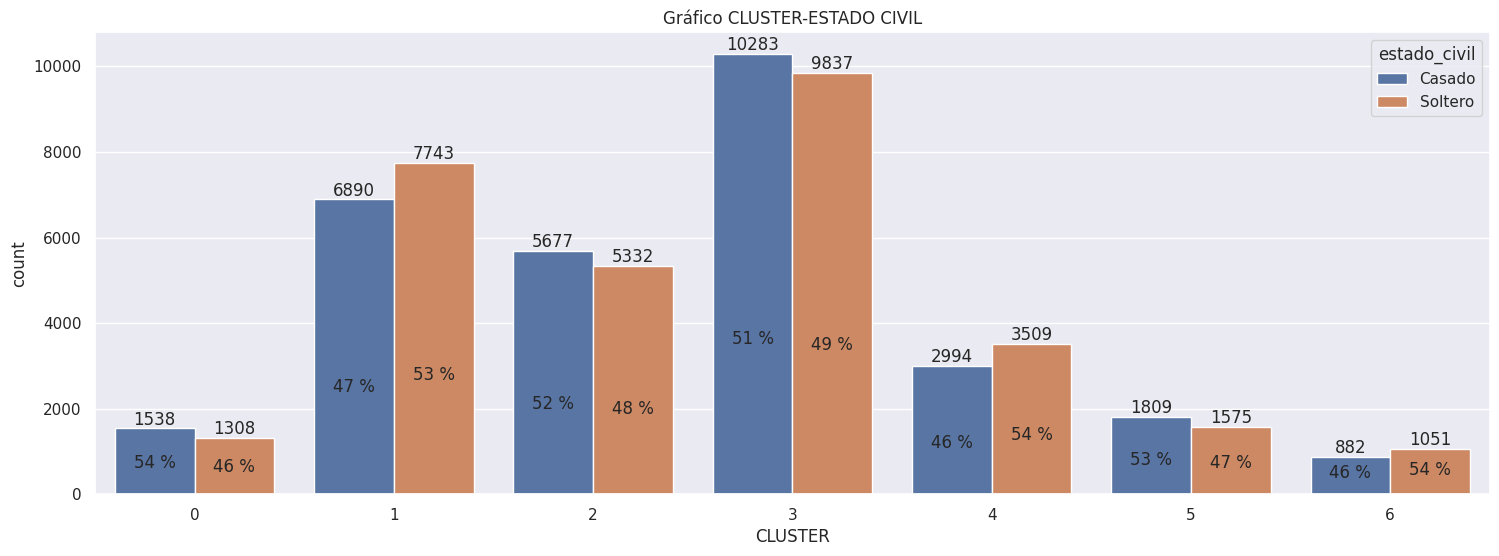

In [ ]:
#ESTADO CIVIL

plt.figure(figsize=(18,6))
grafico = sns.countplot(x=dataset['CLUSTER'], hue=dataset['estado_civil'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################

for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}', ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-ESTADO CIVIL')
plt.show()


**NO SE PRESENTA UNA DIFERENCIA QUE SEA NOTORIA EN LA DISTRIBUCIÓN SEGÚN "ESTADO CIVIL" EN LOS CLUSTERS.**

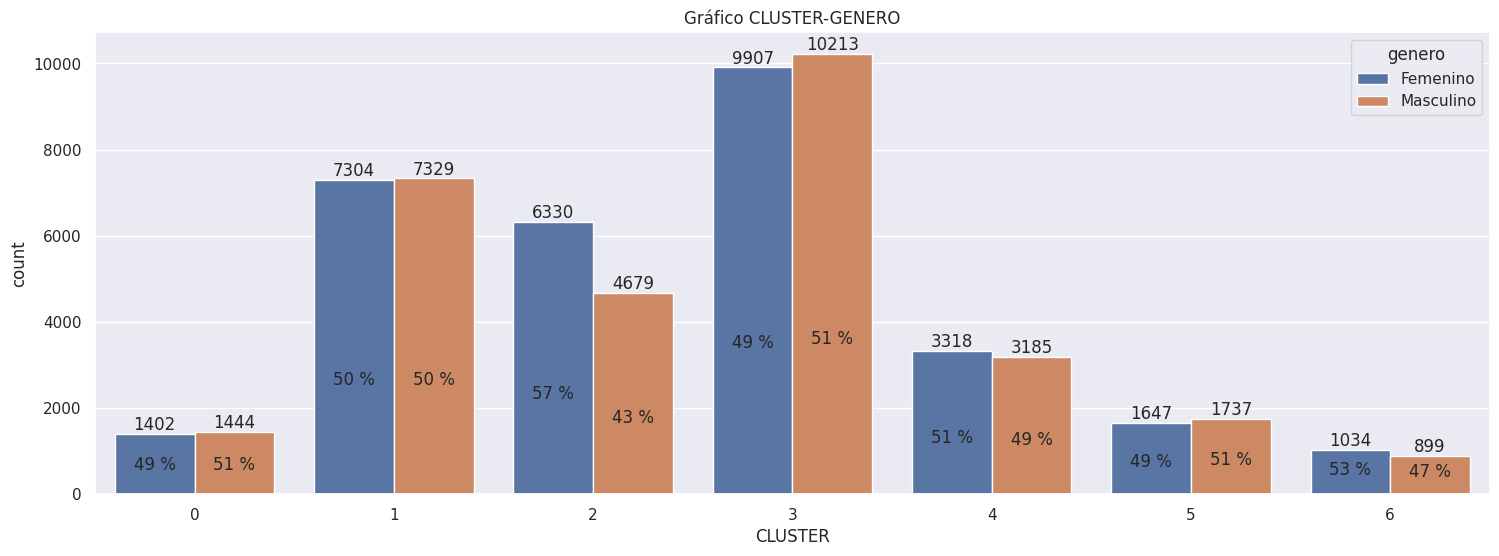

In [ ]:
#GENERO

plt.figure(figsize=(18,6))
grafico= sns.countplot(x=dataset['CLUSTER'], hue=dataset['genero'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################

for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}', ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-GENERO')
plt.show()

**EN LOS CLUSTER 2 Y 6 , HAY UN 6 % MÁS DE MUJERES. EN EL RESTO, LOS GENEROS SE ENCUENTRAN REPARTIDOS DE MANERA SIMILAR.**

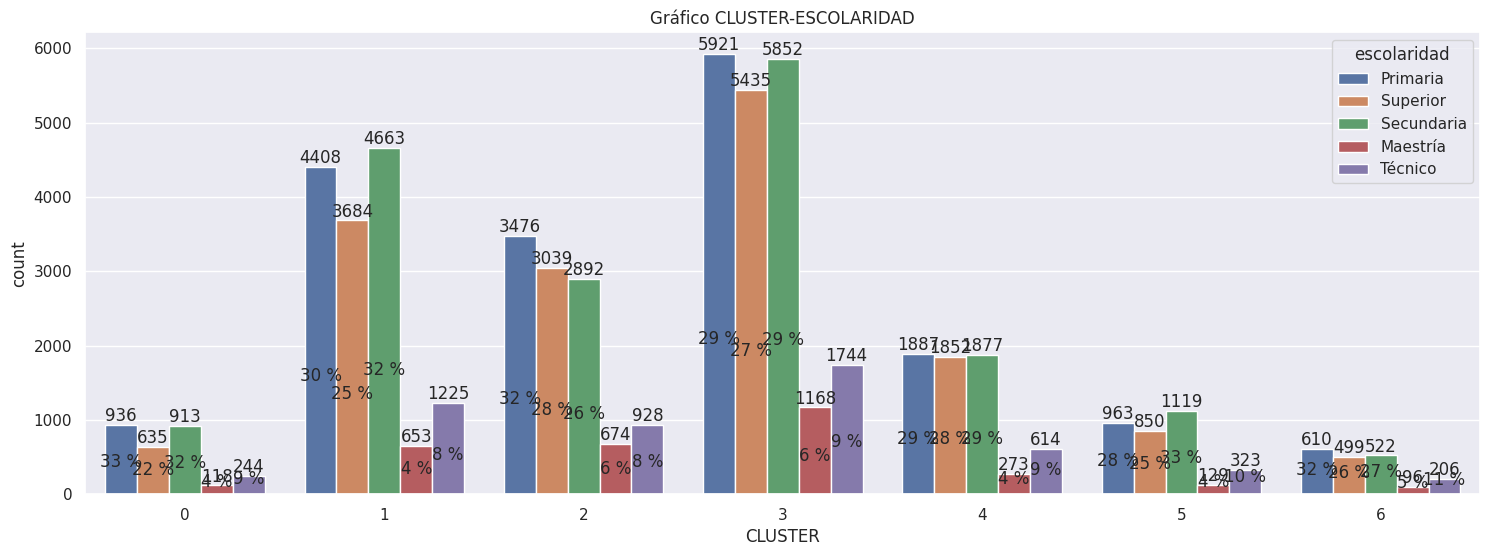

In [ ]:
#ESCOLARIDAD

plt.figure(figsize=(18,6))
grafico=sns.countplot(x=dataset['CLUSTER'], hue=dataset['escolaridad'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,5):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################


for dato in grafico.containers:
  i=1
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[5*i-1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-ESCOLARIDAD')
plt.show()

**LOS CLUSTERS SE ENCUENTRAN CON UNA DISTRIBUCION SIMILAR DE ESCOLARIDAD, NO SE APRECIAN DIFERENCIAS RELEVANTES ENTRE ELLOS.**

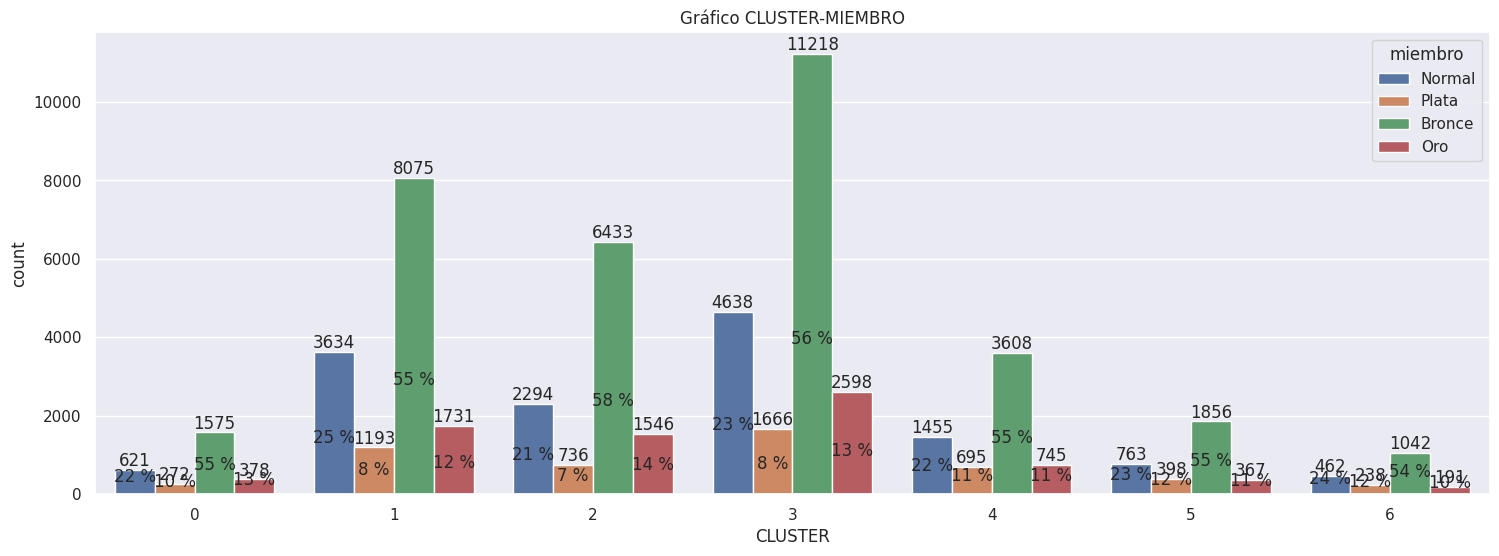

In [ ]:
#MIEMBRO

plt.figure(figsize=(18,6))
grafico = sns.countplot(x=dataset['CLUSTER'], hue=dataset['miembro'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,4):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################



for dato in grafico.containers:
  i=1
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[4*i-1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-MIEMBRO')
plt.show()

**LOS CLUSTERS SE ENCUENTRAN CON UNA DISTRIBUCION SIMILAR SEGÚN EL TIPO DE MIEMBRO QUE ES LA PERSONA, NO SE APRECIAN DIFERENCIAS RELEVANTES ENTRE ELLOS.**

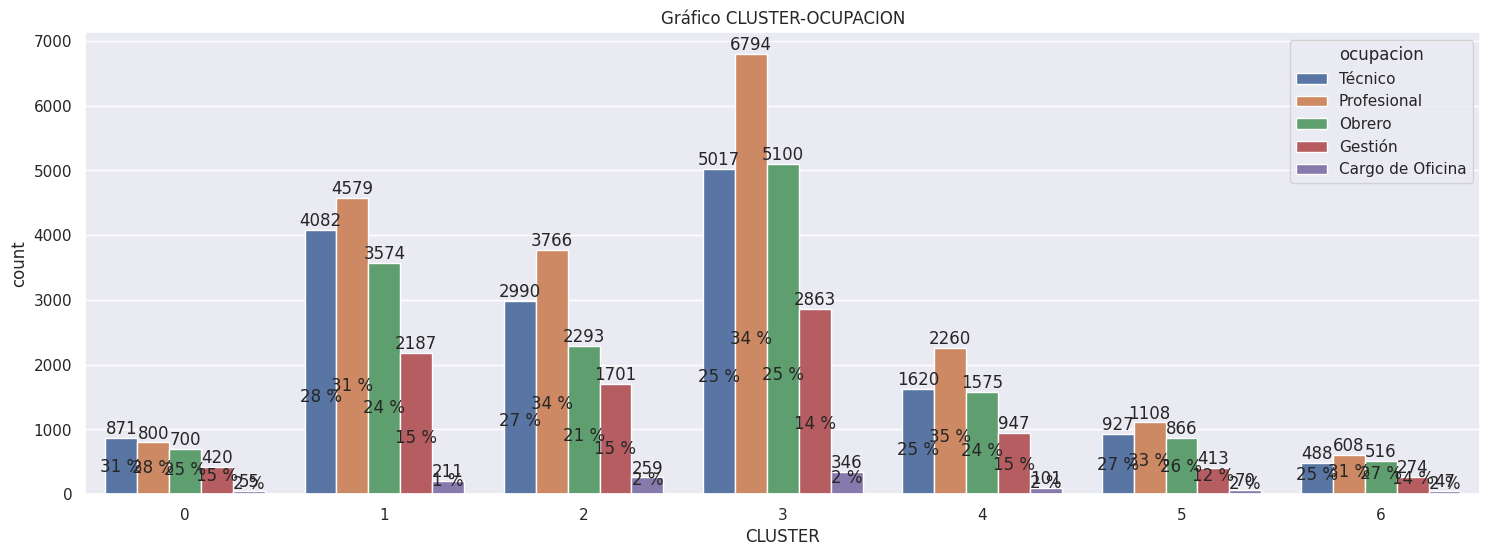

In [ ]:
#OCUPACION

plt.figure(figsize=(18,6))
grafico = sns.countplot(x=dataset['CLUSTER'], hue=dataset['ocupacion'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,5):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################


for dato in grafico.containers:
  i=1
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[5*i-1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-OCUPACION')
plt.show()

**LOS CLUSTERS SE ENCUENTRAN CON UNA DISTRIBUCION SIMILAR SEGÚN EL TIPO DE OCUPACIÓN QUE TIENE LA PERSONA, NO SE APRECIAN DIFERENCIAS RELEVANTES ENTRE ELLOS.**

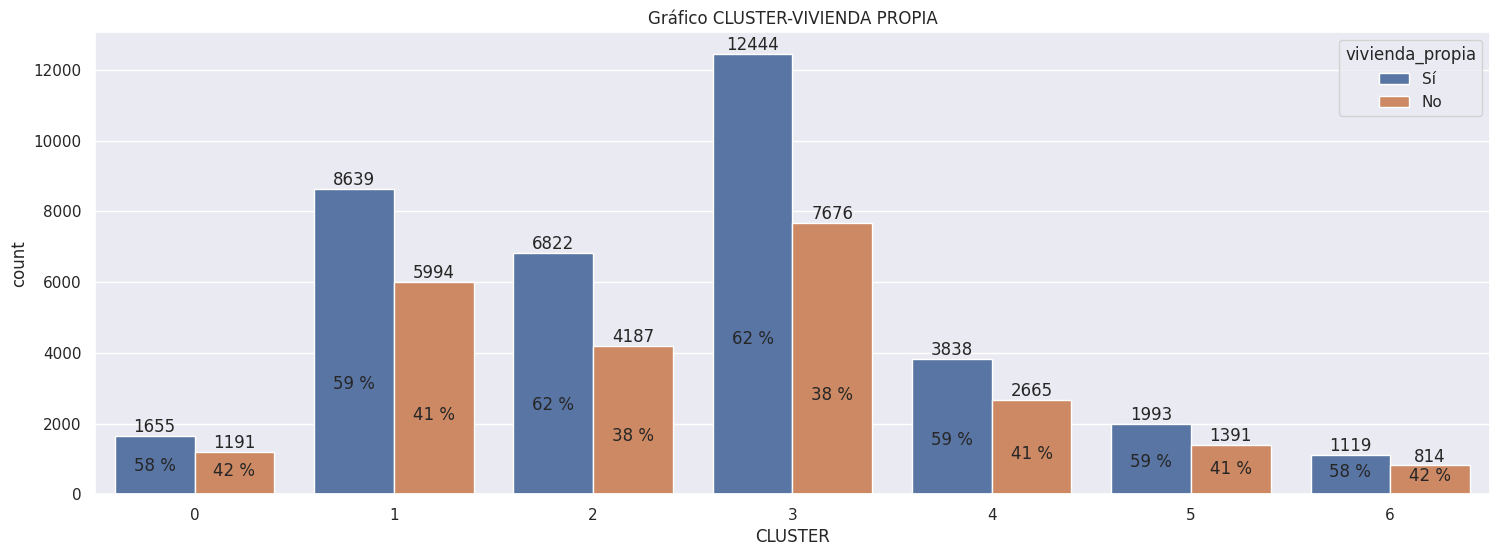

In [ ]:
#VIVIENDA PROPIA

plt.figure(figsize=(18,6))
grafico = sns.countplot(x=dataset['CLUSTER'], hue=dataset['vivienda_propia'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################

for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}', ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-VIVIENDA PROPIA')
plt.show()

**LOS CLUSTERS SE ENCUENTRAN CON UNA DISTRIBUCION SIMILAR DEPENDIENDO SI LA PERSONA POSEE O NO VIVIENDA PROPIA, NO SE APRECIAN DIFERENCIAS RELEVANTES ENTRE ELLOS.**

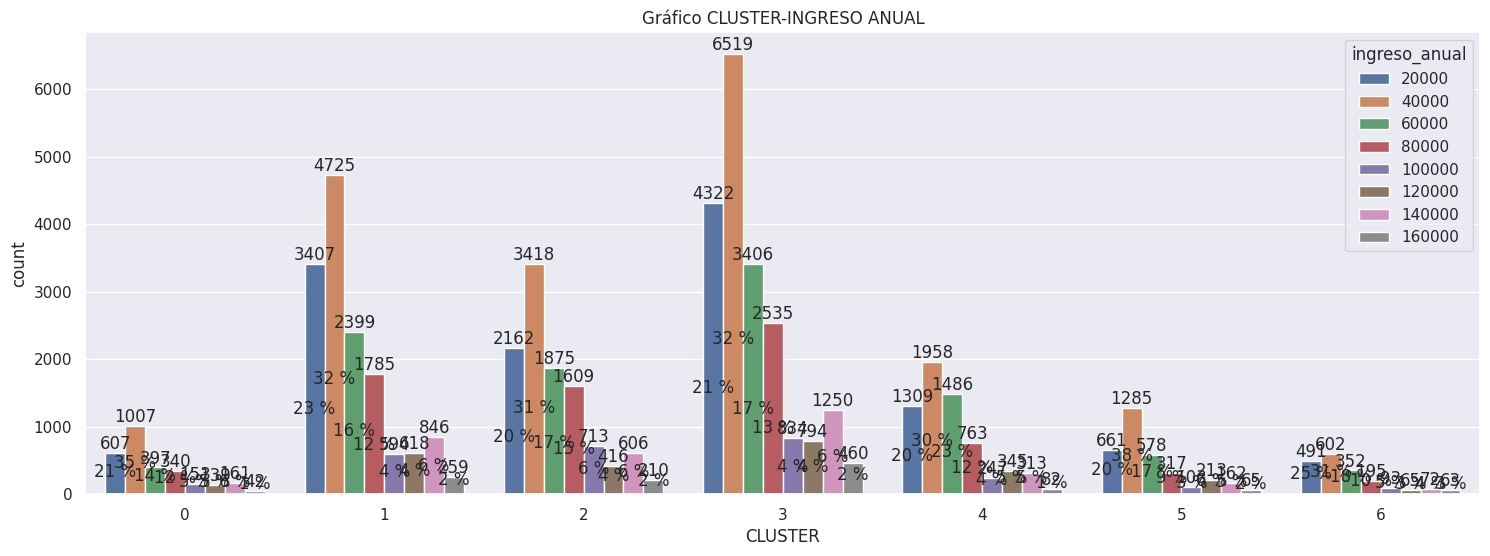

In [ ]:
#INGRESO ANUAL

plt.figure(figsize=(18,6))
grafico = sns.countplot(x=dataset['CLUSTER'], hue=dataset['ingreso_anual'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,8):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################


for dato in grafico.containers:
  i=1
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[8*i-1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-INGRESO ANUAL')
plt.show()

**LOS CLUSTERS SE ENCUENTRAN CON UNA DISTRIBUCION SIMILAR SEGÚN EL TIPO DE INGRESO ANUAL QUE TIENE LA PERSONA, NO SE APRECIAN DIFERENCIAS RELEVANTES ENTRE ELLOS.**

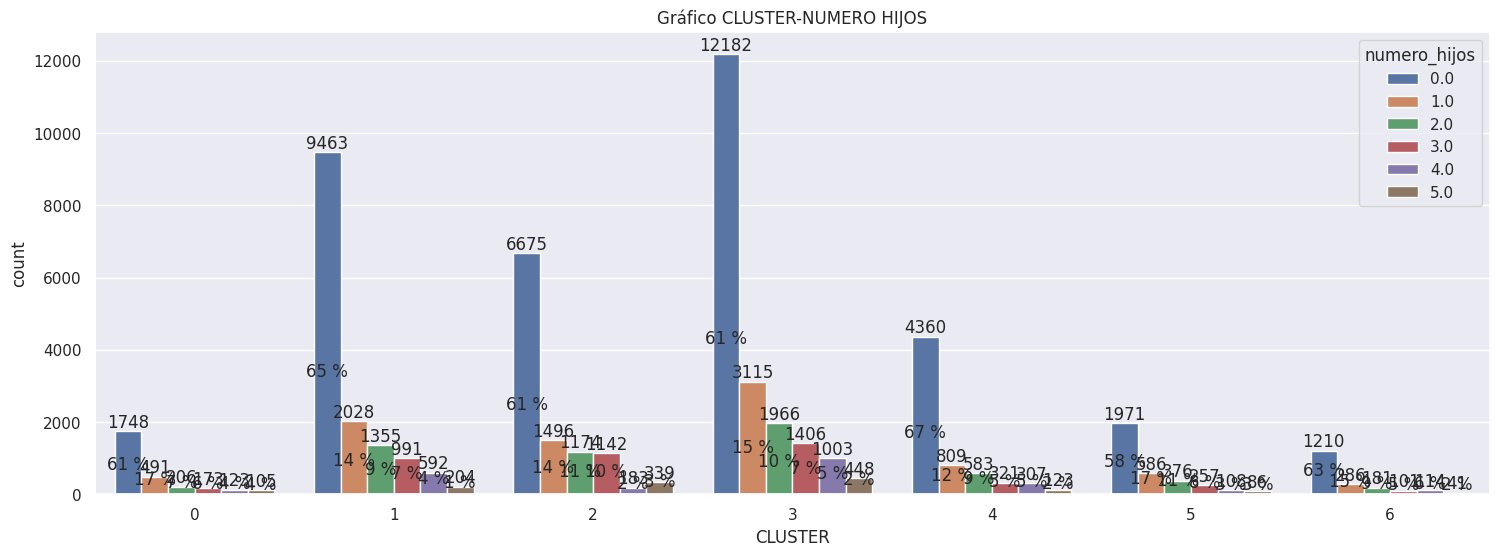

In [ ]:
#NUMERO HIJOS

plt.figure(figsize=(18,6))
grafico=sns.countplot(x=dataset['CLUSTER'], hue=dataset['numero_hijos'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,6):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################


for dato in grafico.containers:
  i=1
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[6*i-1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-NUMERO HIJOS')
plt.show()

**LOS CLUSTERS SE ENCUENTRAN CON UNA DISTRIBUCION SIMILAR SEGÚN LA CANTIDAD DE HIJOS QUE TIENE LA PERSONA, NO SE APRECIAN DIFERENCIAS RELEVANTES ENTRE ELLOS.**

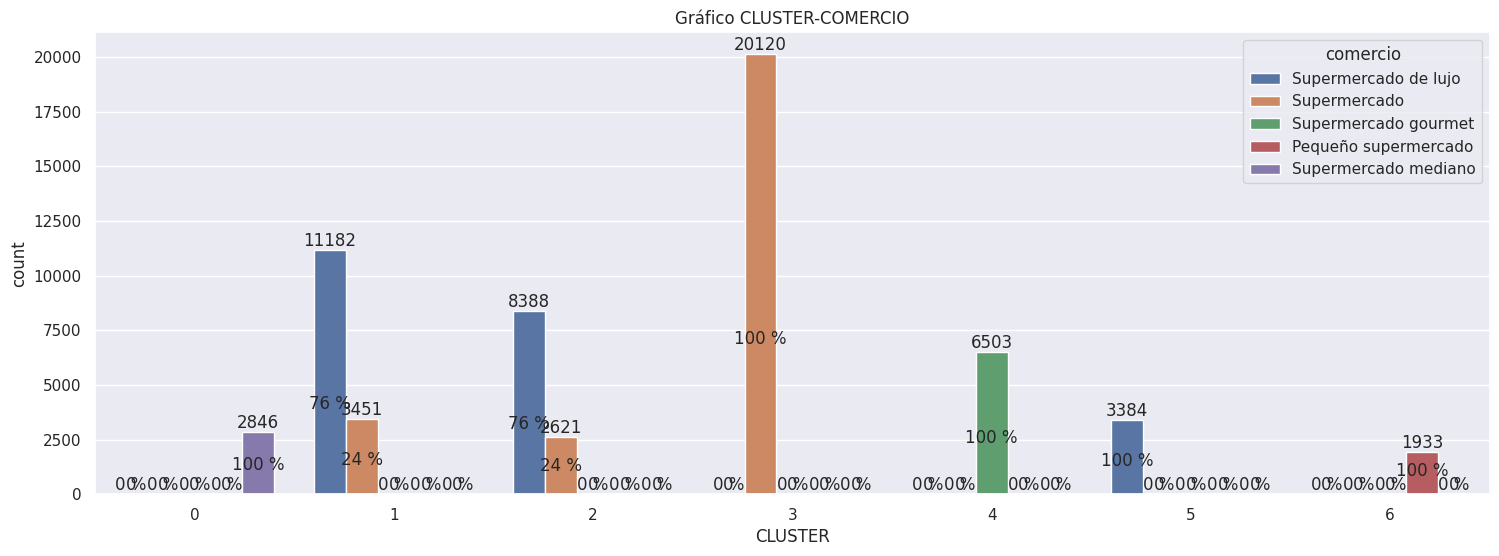

In [ ]:
#COMERCIO

plt.figure(figsize=(18,6))
grafico=sns.countplot(x=dataset['CLUSTER'], hue=dataset['comercio'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,5):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################


for dato in grafico.containers:
  i=1
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}',ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[5*i-1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-COMERCIO')
plt.show()

**EL CLUSTER 0 SOLO CORRESPONDE A SUPERMERCADO MEDIANO. LOS CLUSTER 1-2-5 CORRESPONDEN EN SU GRAN MAYORÍA A SUPERMERCADO DE LUJO. EL CLUSTER 3, ES SOLO SUPERMERCADO. EL CLUSTER 4 ES SOLO SUPERMERCADO GOURMET. EL CLUSTER 6 ES SOLO PEQUEÑO SUPERMERCADO.**

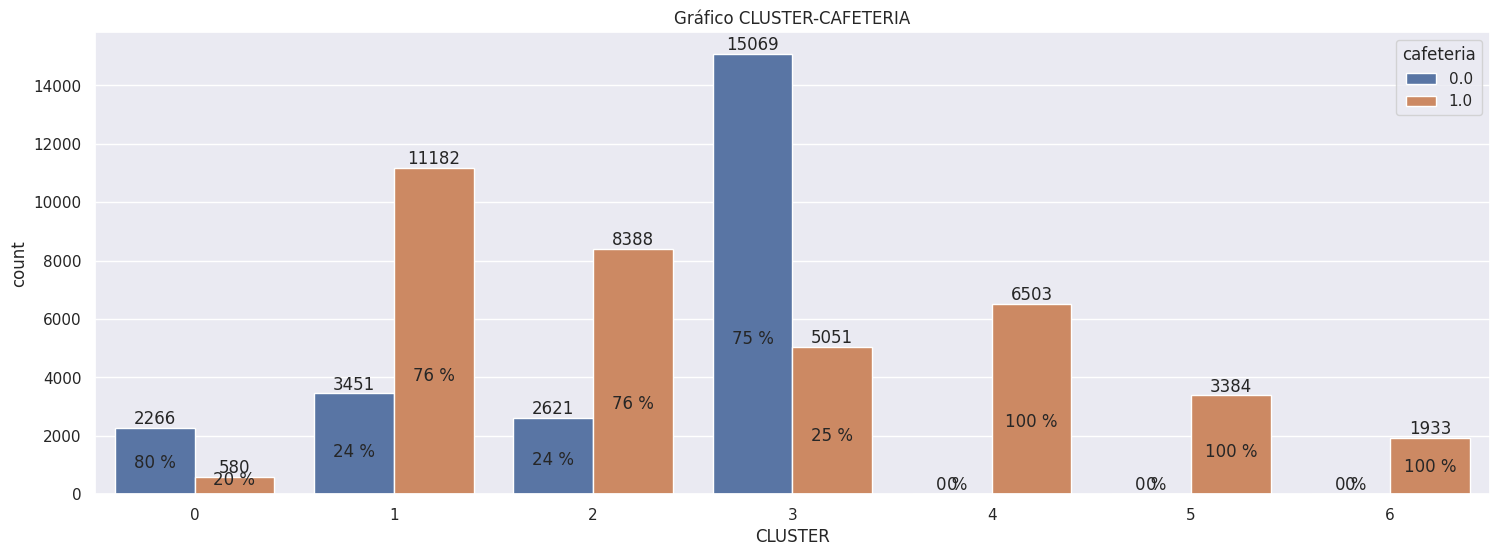

In [ ]:
#CAFETERIA

plt.figure(figsize=(18,6))
grafico=sns.countplot(x=dataset['CLUSTER'], hue=dataset['cafeteria'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################

for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}', ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-CAFETERIA')
plt.show()

**LOS CLUSTER 0-3 NO TIENEN CAFETERÍA, LOS CLUSTER 1-2 TIENEN PREPONDERANCIA 76-24 MIENTRAS QUE EN LOS CLUSTER 4-5-6 SI TODOS POSEEN CAFETERÍA.**



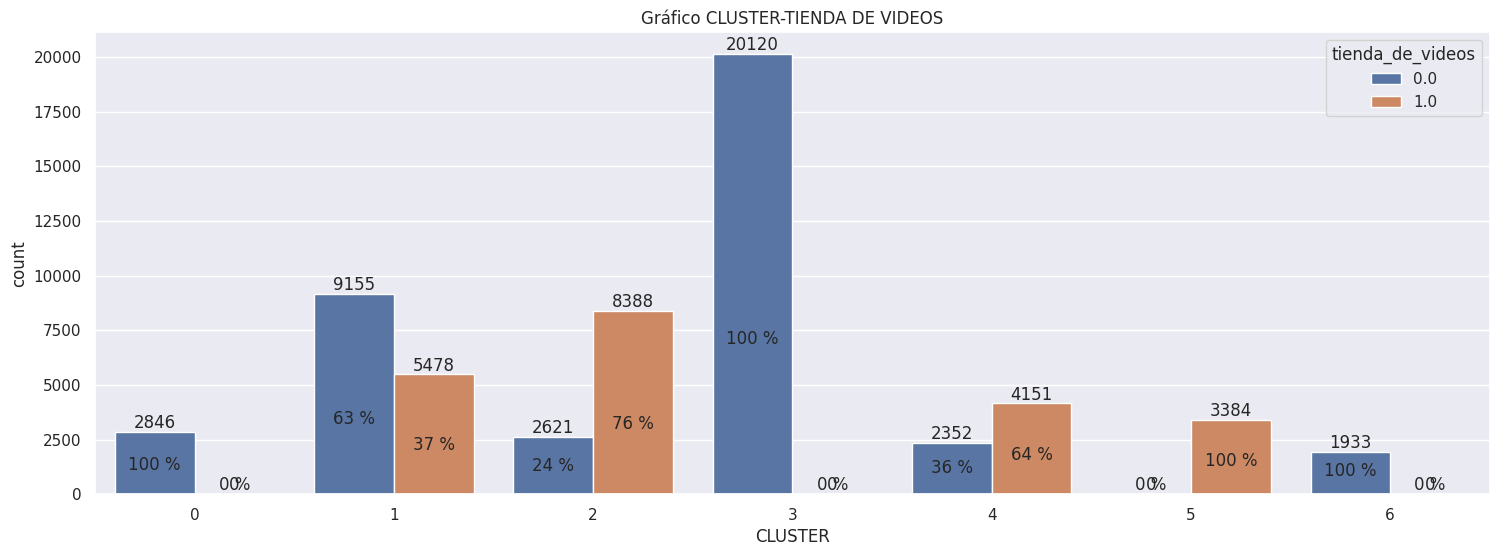

In [ ]:
#TIENDA DE VIDEOS

plt.figure(figsize=(18,6))
grafico=sns.countplot(x=dataset['CLUSTER'], hue=dataset['tienda_de_videos'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################

for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}', ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-TIENDA DE VIDEOS')
plt.show()

**EN LOS CLUSTER 0-3-6 TODOS TIENEN TIENDAS DE VIDEO. EN EL CLUSTER 1 LA PROPORCION ES 63-37 DE LOS QUE TIENEN TIENDAS DE VIDEO. EN LOS CLUSTERS 2-4  HAY MAYORÍA QUE SI POSEE TIENDAS DE VIDEO, EN EL CLUSTER 5 TODOS TIENEN TIENDA DE VIDEO.**

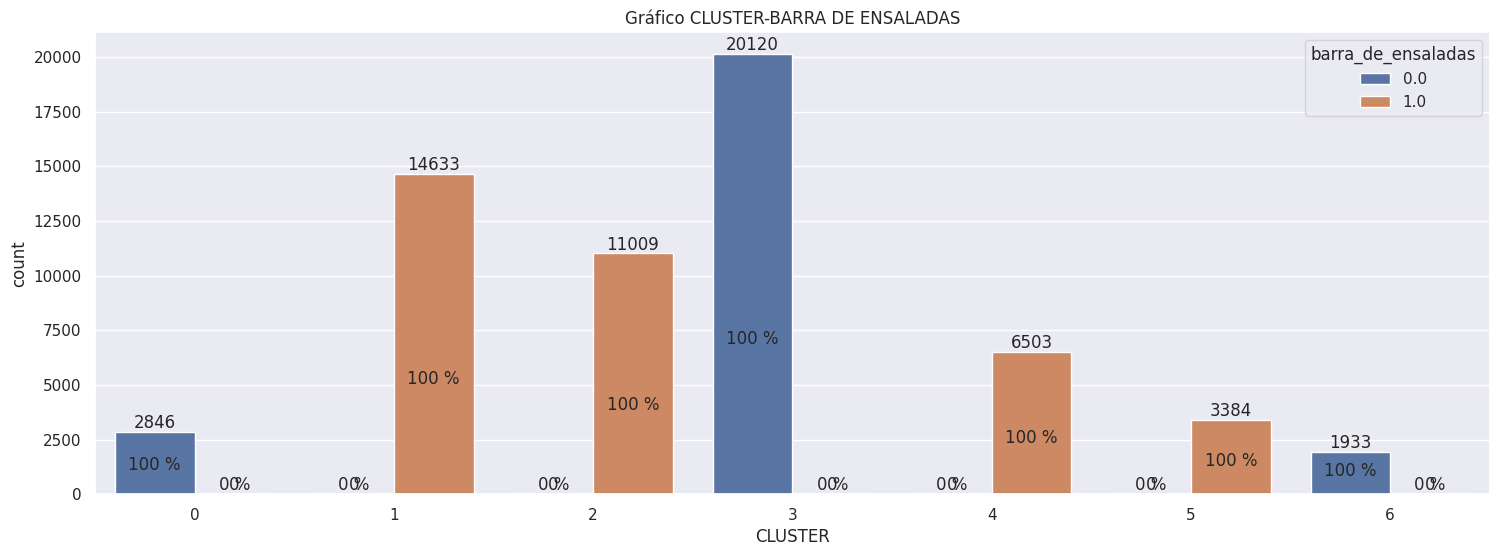

In [ ]:
#BARRA DE ENSALADAS

plt.figure(figsize=(18,6))
grafico=sns.countplot(x=dataset['CLUSTER'], hue=dataset['barra_de_ensaladas'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################

for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}', ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-BARRA DE ENSALADAS')
plt.show()

**EN LOS CLUSTERS 0-3-6 NO HAY BARRA DE ENSALADAS. EN LOS CLUSTERS 1-2-4-5 SI HAY BARRA DE ENSALADAS.**

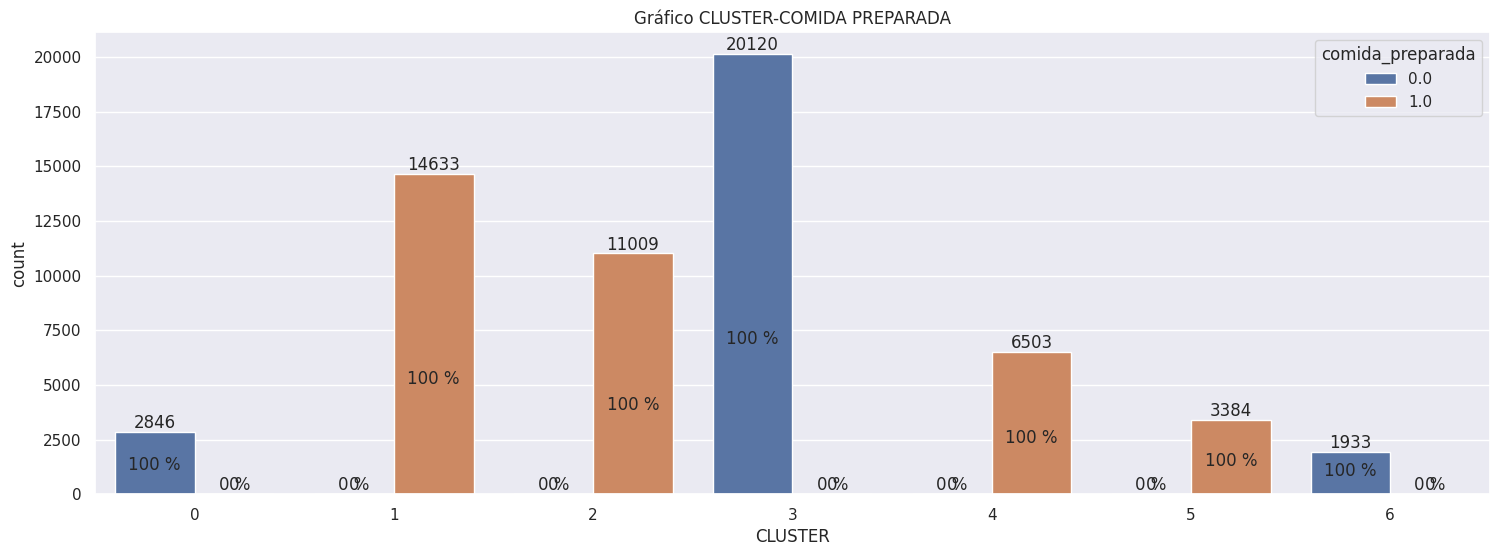

In [ ]:
#COMIDA PREPARADA

plt.figure(figsize=(18,6))
grafico=sns.countplot(x=dataset['CLUSTER'], hue=dataset['comida_preparada'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################

for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}', ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-COMIDA PREPARADA')
plt.show()

**EN LOS CLUSTERS 0-3-6 NO HAY COMIDA PREPARADA. EN LOS CLUSTERS 1-2-4-5 SI HAY COMIDA PREPARADA.**

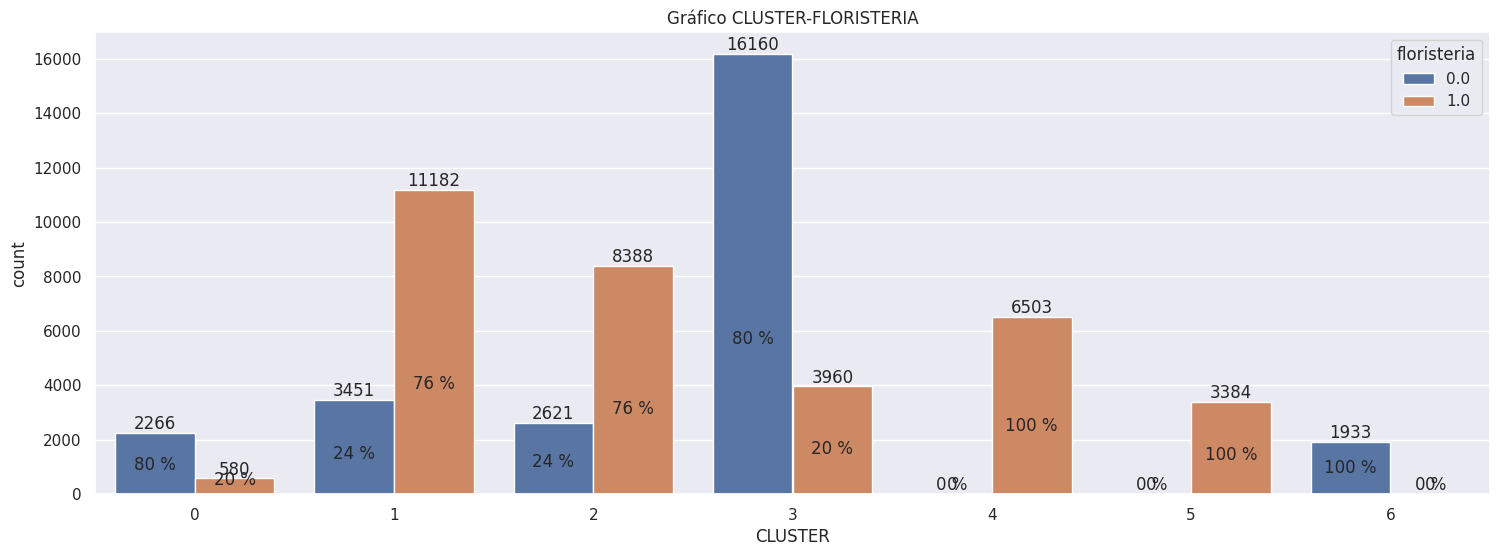

In [ ]:
#FLORISTERIA

plt.figure(figsize=(18,6))
grafico=sns.countplot(x=dataset['CLUSTER'], hue=dataset['floristeria'], data= dataset,palette='deep')

###############################################
# Para cálculo de porcentaje de cada barra
suma=[]
suma2=[]
adicion=0
for dato in grafico.containers:
  for bar in dato:
    height = bar.get_height()
  suma.append(dato.datavalues)

for k in range(0,len(suma[0])):
  adicion=0
  for t in range(0,2):
    adicion = adicion+suma[t][k]
    suma2.append(adicion)
################################################

for dato in grafico.containers:
  i=0
  for bar in dato:
    height = bar.get_height()
    grafico.text(bar.get_x()+ bar.get_width()/2, height, f'{height:.0f}', ha = 'center', va= 'bottom')
    grafico.text(bar.get_x()+ bar.get_width()/2, height/3, f'{100*height/suma2[2*i+1]:.0f} %', ha = 'center', va= 'bottom')
    i=i+1

plt.title('Gráfico CLUSTER-FLORISTERIA')
plt.show()

**LOS CLUSTER 0-3 TIENEN MAYORÍA EN QUE NO HAY FLORISTERÍA. EN EL CLUSTER 6 TODOS TIENEN FLORISTERIA. LOS CLUSTERS 1-2 TIENEN MAYORÍA EN QUE SI HAY FLORISTERÍA 76-24 .LOS CLUSTER 4-5 SOLO HAY FLORISTERIA.**

# 6. Análisis e Interpretación de los clusters

## Descripción de los clusters

In [ ]:
# RESUMEN DE LOS RESULTADOS OBTENIDOS

**CLUSTER 0: MAYORES VENTAS UNITARIAS / 80% DE PERSONAS SON DE MEXICO / SOLO CORRESPONDE A SUPERMERCADO MEDIANO / 80% NO TIENEN CAFETERÍA / NO HAY TIENDAS DE VIDEO / NO HAY BARRA DE ENSALADAS / NO HAY COMIDA PREPARADA / EN EL 80% NO HAY FLORISTERIA.**

**CLUSTER 1:EL 100% SON DE ESTADOS UNIDOS / 76% SUPERMERCADO DE LUJO / 76%  TIENE CAFETERÍA / 63% NO TIENEN TIENDAS DE VIDEO / TODOS TIENEN BARRA DE ENSALADAS / TODOS TIENEN COMIDA PREPARADA / 76% TIENE FLORISTERÍA.**

**CLUSTER 2: MAYOR COSTO TIENDA / MAYOR VENTA TIENDA / EL 100% SON DE MEXICO / HAY UN 6% MÁS DE MUJERES / 76% SUPERMERCADO DE LUJO / 76% TIENE CAFETERÍA / 76% TIENE TIENDA DE VIDEO. / TODOS TIENEN BARRA DE ENSALADAS / TODOS TIENEN COMIDA PREPARADA / 76% TIENEN FLORISTERÍA.**

**CLUSTER 3: 93% SON DE ESTADOS UNIDOS / SOLO SUPERMERCADO / 75% NO TIENE CAFETERIA / NINGUNO TIENE TIENDA DE VIDEOS/ NINGUNO TIENE BARRA DE ENSALADAS / NINGUNO TIENE COMIDA PREPARADA / 80% NO TIENE FLORISTERIA.**

**CLUSTER 4: 64% SON DE ESTADOS UNIDOS 36% DE MEXICO / SOLO SUPERMERCADO GOURMET /TODOS POSEEN CAFETERÍA / 64% TIENE TIENDA DE VIDEOS / EN TODOS HAY BARRAS DE ENSALADAS / EN TODOS HAY COMIDA PREPARADA / EN TODOS HAY FLORISTERIA.**

**CLUSTER 5: EL 100% SON DE CANADA / TODOS SON SUPERMERCADOS DE LUJO / TODOS POSEEN CAFETERIA /  TODOS TIENEN TIENDA DE VIDEOS / TODOS TIENEN BARRA DE ENSALADAS / TODOS TIENEN COMIDA PREPARADA / EN TODOS HAY FLORISTERIA.**

**CLUSTER 6: MENOR COSTO TIENDA / MENOR VENTA TIENDA / MENORES VENTAS UNITARIAS / EL 77% SON DE ESTADOS UNIDOS / HAY UN 6% MAS DE MUJERES / SOLO PEQUEÑO SUPERMERCADO / TODOS TIENEN CAFETERIA /NINGUNO TIENE TIENDA DE VIDEOS/ NO HAY BARRA DE ENSALADAS / NO HAY COMIDA PREPARADA / TODOS TIENEN FLORISTERIA.**

## Posibles estrategias a implementar

In [ ]:
# ESTRATEGIAS SUGERIDAS

**CLUSTER 0 : TIENEN MAYORES VENTAS UNITARIAS, ENFOCARSE EN MERCADO MEXICANO , SUPERMERCADOS MEDIANOS, HAY QUE OCUPAR TODOS LOS ESPACIOS
DISPONIBLES PARA OFRECER MÁS PRODUCTOS AL PÚBLICO , YA QUE ELLOS NO MUESTRAN DEMANDA POR SECTORES PARA COMPRA DE COMIDA PREPARADA NI BARRA
DE ENSALADAS Y MUY POCO EN CAFETERIA. LA FLORISTERÍA TIENE PRESENCIA DEL 20%, PODRÍA CONSIDERAR ELIMINARSE PARA COLOCAR MÁS PRODUCTOS DE VENTA EN SU LUGAR.**

**CLUSTER 1: SUPERMERCADO DE LUJO, 100% PERSONAS DE ESTADOS UNIDOS, AUMENTAR OFERTA DE COMIDA PREPARADA Y BARRA DE ENSALADAS, AUMENTAR TAMBIÉN OFERTA DE PRODUCTOS EN CAFETERÍA DE MANERA DE PROLONGAR LA ESTANCIA Y QUE LA GENTE CONSUMA MÁS PRODUCTOS Y SERVICIOS. TODA LA MEJORA PUEDE HACERSE CONSIDERANDO QUE EL PUBLICO ESTÁ DISPUESTO A PAGAR MÁS POR UNA EXPERIENCIA EN LA QUE SIENTAN LA EXCLUSIVIDAD.**

**CLUSTER 2: CORRESPONDE A MAYOR COSTO Y MAYOR VENTA POR TIENDA, TODOS SON MEXICANOS  Y GRAN PARTE DE LOS SUPERMERCADOS SON DE LUJO, COMO HAY UN 6% MÁS DE MUJERES SE PUEDE PONER ÉNFASIS EN PRODUCTOS EXCLUSIVOS "CONSIDERANDO QUE LOS CLIENTES PUEDEN ESTAR DISPUESTOS A GASTAR MÁS POR SER EN SU MAYORÍA SUPERMERCADOS EXCLUSIVOS" QUE TENGA EL GÉNERO FEMENINO COMO FOCO. COMO EXISTE BARRA DE ENSALADAS, COMIDA PREPARADA Y LA MAYORÍA POSEE CAFETERÍA, HAY QUE AUMENTAR Y MEJORAR ESTOS TRES TIPOS DE SERVICIOS PARA CREAR MAYOR FIDELIDAD DEL CLIENTE.  POR EJEMPLO, SI SE LOGRA QUE MAS PERSONAS CONSUMAN PRODUCTOS EN LA CAFETERÍA, AUMENTAN LAS PROBABILIDADES TAMBIÉN DE QUE PASEN MÁS TIEMPO EN EL SUPERMERCADO, CON LO QUE LAS VENTAS PUEDEN MEJORAR.**

**CLUSTER 3: EL 93% SON DE ESTADOS UNIDOS Y SOLO SUPERMERCADO, SIN SERVICIOS ADICIONALES, POR LO QUE SE DEDUCE QUE SE TRATA DE PERSONAS QUE LE INTERESA HACER LAS COMPRAS Y SEGUIR CON SUS ACTIVIDADES, POR LO QUE HAY QUE PREOCUPARSE DE QUE LA ESTANCIA SEA LO MÁS EXPEDITA POSIBLE, POR EJEMPLO AUMENTANDO LA CANTIDAD DE AUTO SERVICIO PARA PAGO Y PUEDE SER TAMBIÉN EL TENER MÁS CAJEROS HUMANOS DISPOBIBLES EN HORARIOS PUNTA PARA QUE LAS PERSONAS SIENTAN QUE EL SERVICIO ES RÁPIDO Y CÓMODO, DE ESTA MANERA SE FIDELIZA MÁS AL CLIENTE.**

**CLUSTER 4: 2/3 SON DE ESTADOS UNIDOS Y 1/3 DE MÉXICO, SOLO SUPERMERCADO GOURMET, LO QUE QUIERE DECIR QUE SE OFRECEN PRODUCTOS FRESCOS Y SELECCIONADOS, COMO EN TODOS HAY BARRA DE ENSALADAS, COMIDA PREPARADA Y CAFETERÍA , ENTONCES SE PUEDE MEJORAR LA OFERTA DE PRODUCTOS SEGÚN LA IDIOSINCRACIA DE CADA PAÍS, YA QUE LAS PERSONAS DE ESTADOS UNIDOS PUEDEN TENER DISTINTOS GUSTOS QUE LOS MEXICANOS, POR LO QUE SE PODRÍAN HACER ENCUESTAS MUY CORTAS ENTRE LOS CLIENTES PARA SABER QUE PRODUCTOS DESEAN, DE ESTA MANERA LA OFERTA DE PRODUCTOS PARA AMBOS PAÍSES SE IRÁ DIFERENCIANDO.**

**CLUSTER 5: EL 100% DE LAS PERSONAS SON DE CANADA Y LOS SUPERMERCADOS SON TODOS DE LUJO, TODOS CON CAFETERÍA, BARRA DE ENSALADAS Y COMIDA PREPARADA. POR LO QUE LA GENTE ESTÁ DISPUESTA A PASAR SU TIEMPO EN EL SUPERMERCADO TENIENDO EN CUENTA DE QUE ESTÁ RECIBIENDO UNA ATENCIÓN EXCLUSIVA. SE PUEDEN IMPLEMENTAR ENCUENTAS DE SATISFACCIÓN Y REQUERIMIENTOS PARA ENTENDER DE MEJOR MANERA COMO OPERA LA IDIOSINCRACIA CANADIENSE, YA QUE CON TODA PROBABILIDAD SE DEBERÁN OFRECER PRODUCTOS DIFERENTES A LOS QUE SE OFRECEN A MEXICANOS Y ESTADO UNIDENSES.**

**CLUSTER 6: MENORES COSTO TIENDA/MENOR VENTA TIENDA Y MENORES VENTAS UNITARIAS, EL SUPERMERCADO ES DE TIPO PEQUEÑO Y EL 77% SON DE ESTADOS UNIDOS, CON 6% MÁS DE MUJERES. AUNQUE SON SUPERMERCADOS PEQUEÑOS TODOS TIENEN CAFETERIA. SE PUEDEN HACER PROMOCIONES ESPECIALES PARA INCENTIVAR A LAS PERSONAS A USAR MÁS LA CAFETERÍA, AUMENTANDO EL TIEMPO DE ESTADÍA EN EL SUPERMERCADO, TAMBIÉN SE PUEDEN COLOCAR CARTELES CON OFERTAS Y PACKS ESPECIALES RODEANDO LA CAFETERÍA, ENTONCES SI YA SE LOGRA QUE PERMANEZCAN EN LA CAFETERÍA MEJORANDO EL SERVICIO, A SU VEZ LAS PERSONAS TENDRÁN MÁS ACCESO A VER LAS OFERTAS , ADEMÁS SE PUEDE HACER UN ÉNFASIS EN PRODUCTOS PARA EL GÉNERO FEMENINO POR SER UN 6% MAYOR EN CANTIDAD AL GÉNERO MASCULINO. ADEMAS TENER EN CUENTA QUE LA MAYORÍA UNIDADES DE ESTE CLUSTER PERTENECE A LOS ESTADOS UNIDOS, PARA CONSIDERAR QUE ES LO QUE SE LES ESTÁ OFRECIENDO.**